In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

# Problem 1

## 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

### Reading data and basic analysis

In [330]:
comp=pd.read_excel('compactiv.xlsx')

In [331]:
comp.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [332]:
comp.shape

(8192, 22)

In [333]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [334]:
comp.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [335]:
comp['rchar'].fillna(0,inplace=True)

In [336]:
comp['wchar'].fillna(0,inplace=True)

In [337]:
comp.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [338]:
comp.shape

(8192, 22)

In [339]:
comp.describe(include='all').round(2).T

count unique            top  freq        mean        std    min  \
lread     8192.0    NaN            NaN   NaN       19.56      53.35    0.0   
lwrite    8192.0    NaN            NaN   NaN       13.11      29.89    0.0   
scall     8192.0    NaN            NaN   NaN     2306.32    1633.62  109.0   
sread     8192.0    NaN            NaN   NaN      210.48     198.98    6.0   
swrite    8192.0    NaN            NaN   NaN      150.06     160.48    7.0   
fork      8192.0    NaN            NaN   NaN        1.88       2.48    0.0   
exec      8192.0    NaN            NaN   NaN        2.79       5.21    0.0   
rchar     8192.0    NaN            NaN   NaN   194879.85  239332.57    0.0   
wchar     8192.0    NaN            NaN   NaN    95727.39  140772.42    0.0   
pgout     8192.0    NaN            NaN   NaN        2.29       5.31    0.0   
ppgout    8192.0    NaN            NaN   NaN        5.98      15.21    0.0   
pgfree    8192.0    NaN            NaN   NaN       11.92      32.36    0.0   
pgscan    8192.0    NaN            NaN   NaN       21.53      71.14    0.0   
atch      8192.0    NaN            NaN   NaN        1.13       5.71    0.0   
pgin      8192.0    NaN            NaN   NaN        8.28      13.87    0.0   
ppgin     8192.0    NaN            NaN   NaN       12.39      22.28    0.0   
pflt      8192.0    NaN            NaN   NaN      109.79     114.42    0.0   
vflt      8192.0    NaN            NaN   NaN      185.32      191.0    0.2   
runqsz      8192      2  Not_CPU_Bound  4331         NaN        NaN    NaN   
freemem   8192.0    NaN            NaN   NaN     1763.46     2482.1   55.0   
freeswap  8192.0    NaN            NaN   NaN  1328125.96  422019.43    2.0   
usr       8192.0    NaN            NaN   NaN       83.97       18.4    0.0   

                25%        50%        75%        max  
lread           2.0        7.0       20.0     1845.0  
lwrite          0.0        1.0       10.0      575.0  
scall        1012.0     2051.5    3317.25    12493.0  
sread          86.0      166.0      279.0     5318.0  
swrite         63.0      117.0      185.0     5456.0  
fork            0.4        0.8        2.2      20.12  
exec            0.2        1.2        2.8      59.56  
rchar       31606.5   122035.0  265394.75  2526649.0  
wchar      22846.75    46434.5   106037.0  1801623.0  
pgout           0.0        0.0        2.4      81.44  
ppgout          0.0        0.0        4.2      184.2  
pgfree          0.0        0.0        5.0      523.0  
pgscan          0.0        0.0        0.0     1237.0  
atch            0.0        0.0        0.6     211.58  
pgin            0.6        2.8       9.76      141.2  
ppgin           0.6        3.8       13.8     292.61  
pflt           25.0       63.8      159.6      899.8  
vflt           45.4      120.4      251.8     1365.0  
runqsz          NaN        NaN        NaN        NaN  
freemem       231.0      579.0    2002.25    12027.0  
freeswap  1042623.5  1289289.5  1730379.5  2243187.0  
usr            81.0       89.0       94.0       99.0

In [340]:
comp.duplicated().value_counts()

False    8192
dtype: int64

Observations:
- There are 8192 datapoints and 22 fields in the given dataset
- All the fields are numerical, except for 'runqsz' which has two categories- CPU bound and Non-CPU-bound
- The field 'usr', which is the percentage of time the CPU runs in user mode, is the target variable for the linear regression
- The fields 'rchar' and 'wchar' have NaN values. These represent the number of characters transferred during system read and write calls. 
- Based on domain knowledge, it is plausible that either of these can be 0, but not both 0 for a given datapoint. So, for further analysis, we choose to impute with 0. As the number is very limited when compared to the depth of the dataset(119 in 8192), the choice is justified.
- There are no bad values in the dataset
- Some fields have outliers
- There are no duplicate values

### EDA

#### Univariate analysis

In [341]:
comp_num=comp.drop(['runqsz'],axis=1)
comp_cat=comp.runqsz

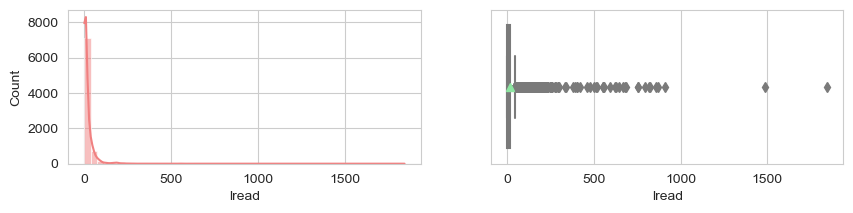

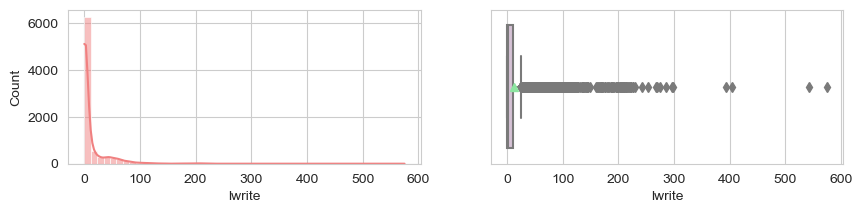

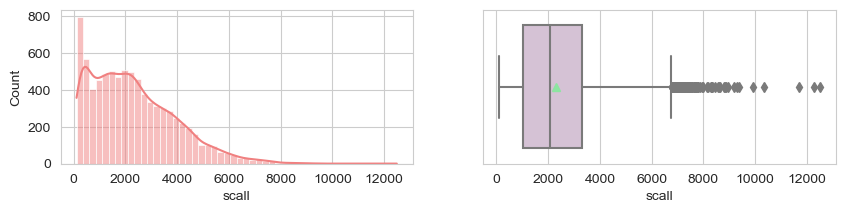

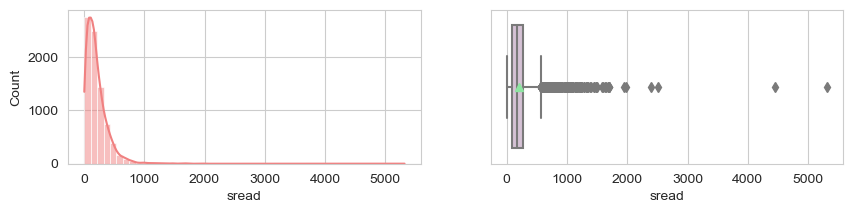

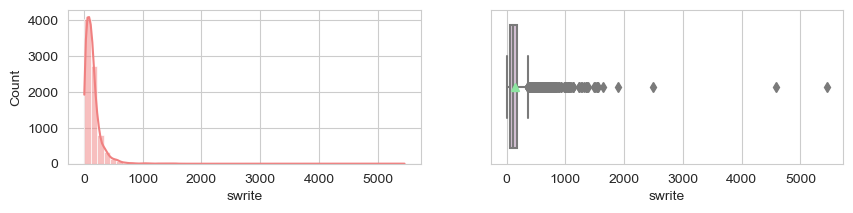

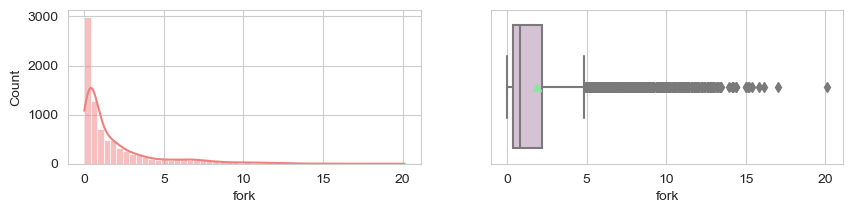

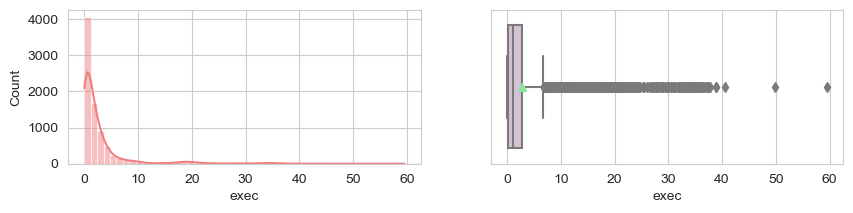

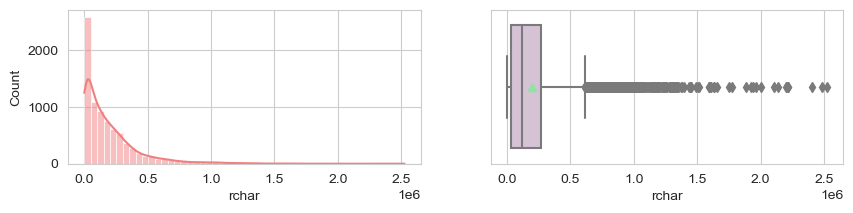

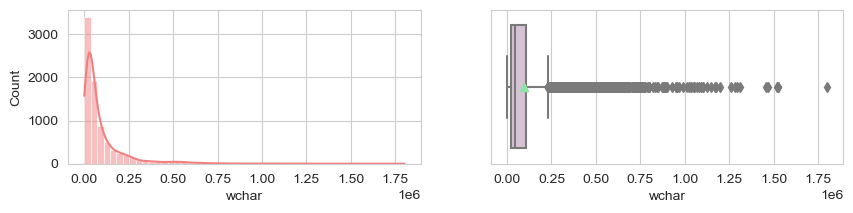

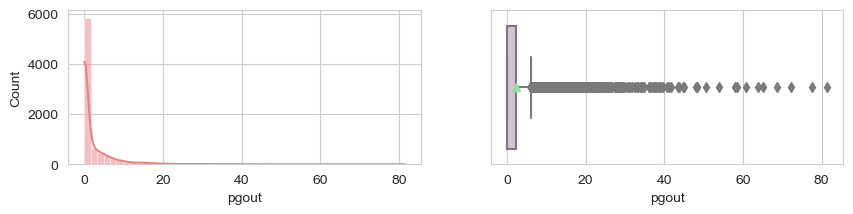

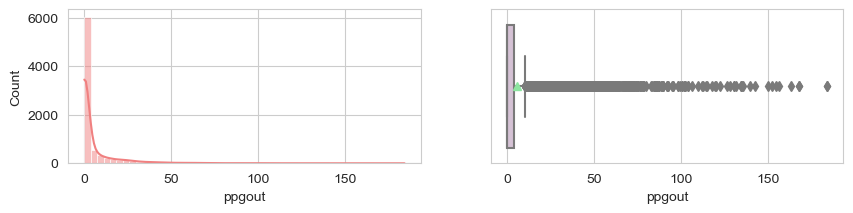

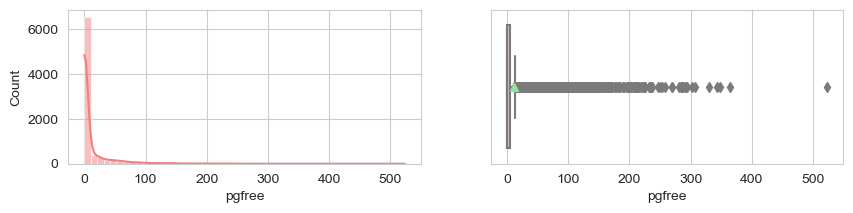

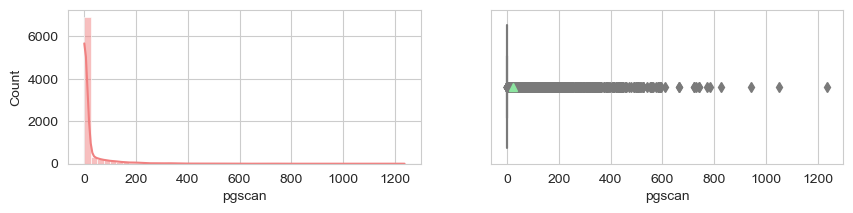

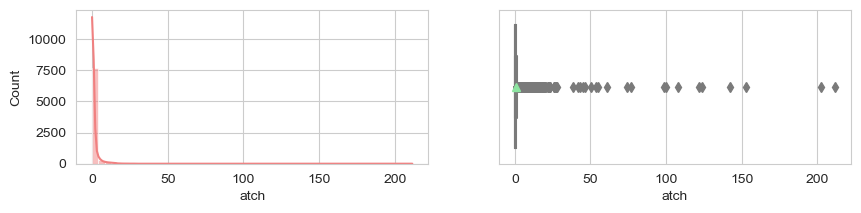

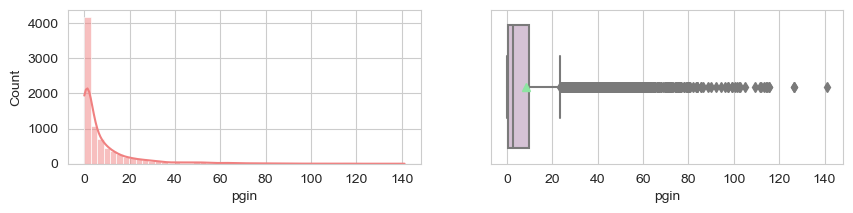

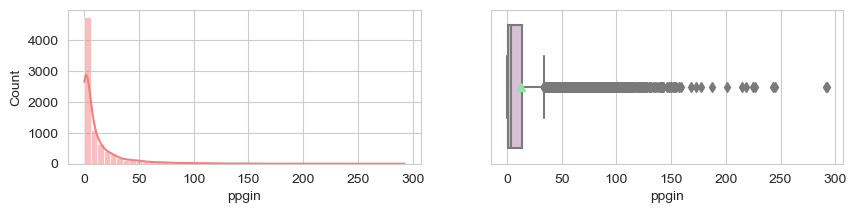

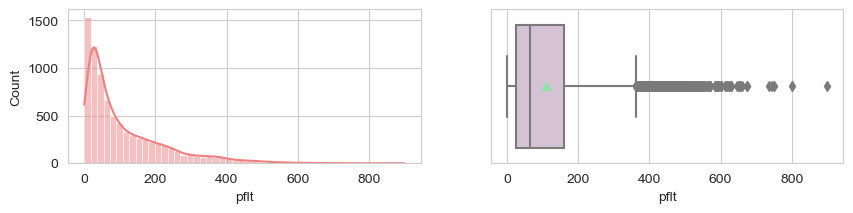

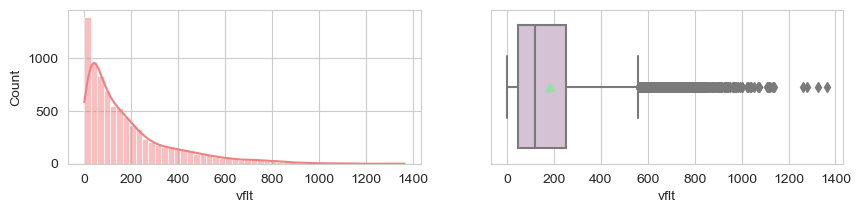

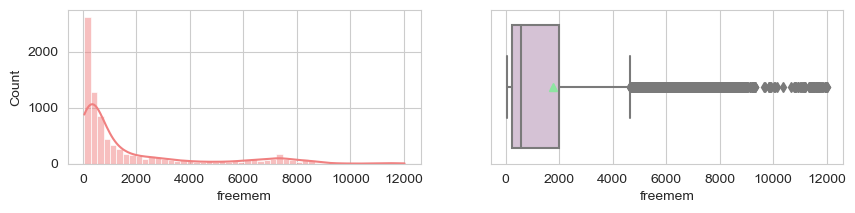

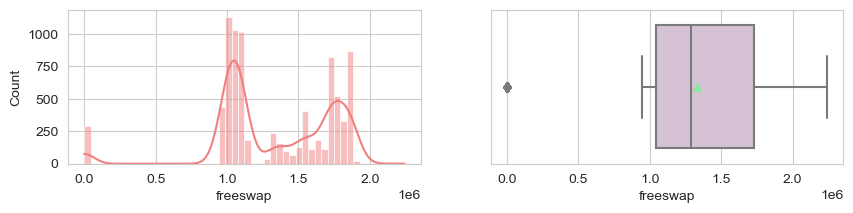

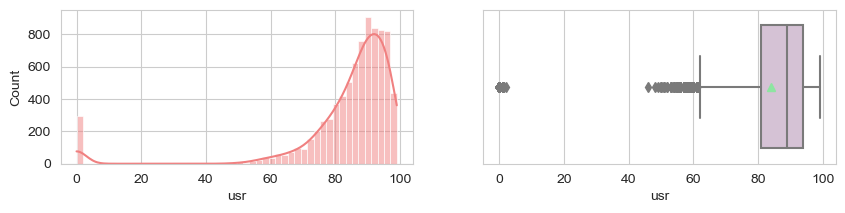

In [342]:
for i in comp_num:
    fig,axes= plt.subplots(ncols=2,figsize=(10,2));
    sns.set_style('whitegrid');
    sns.histplot(comp_num[i],kde=True,ax=axes[0], bins=50, color='lightcoral');
    sns.boxplot(comp_num[i],showmeans=True, ax=axes[1], color='thistle');
    plt.show();

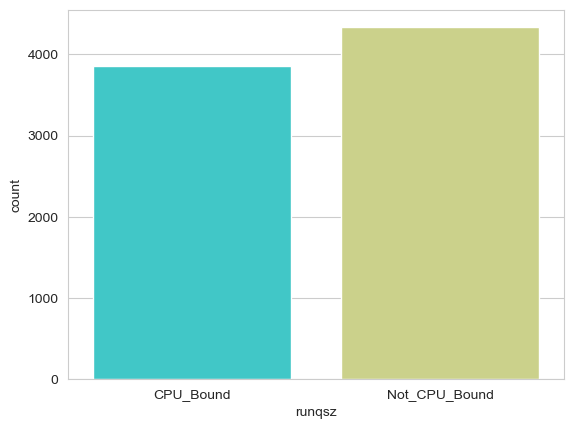

In [343]:
sns.countplot(comp_cat, palette='rainbow');

Observations:
- Univariate analysis of numerical fields:
    - All fields have outliers and hence are skewed
    - The 'freeswap' field has a bimodal distribution
- Univariate analysis of categorical field:
    - There are more instances of 'Not_CPU_Bound' than 'CPU_Bound'

#### Bivariate Analysis

In [344]:
sns.set_palette='deep'

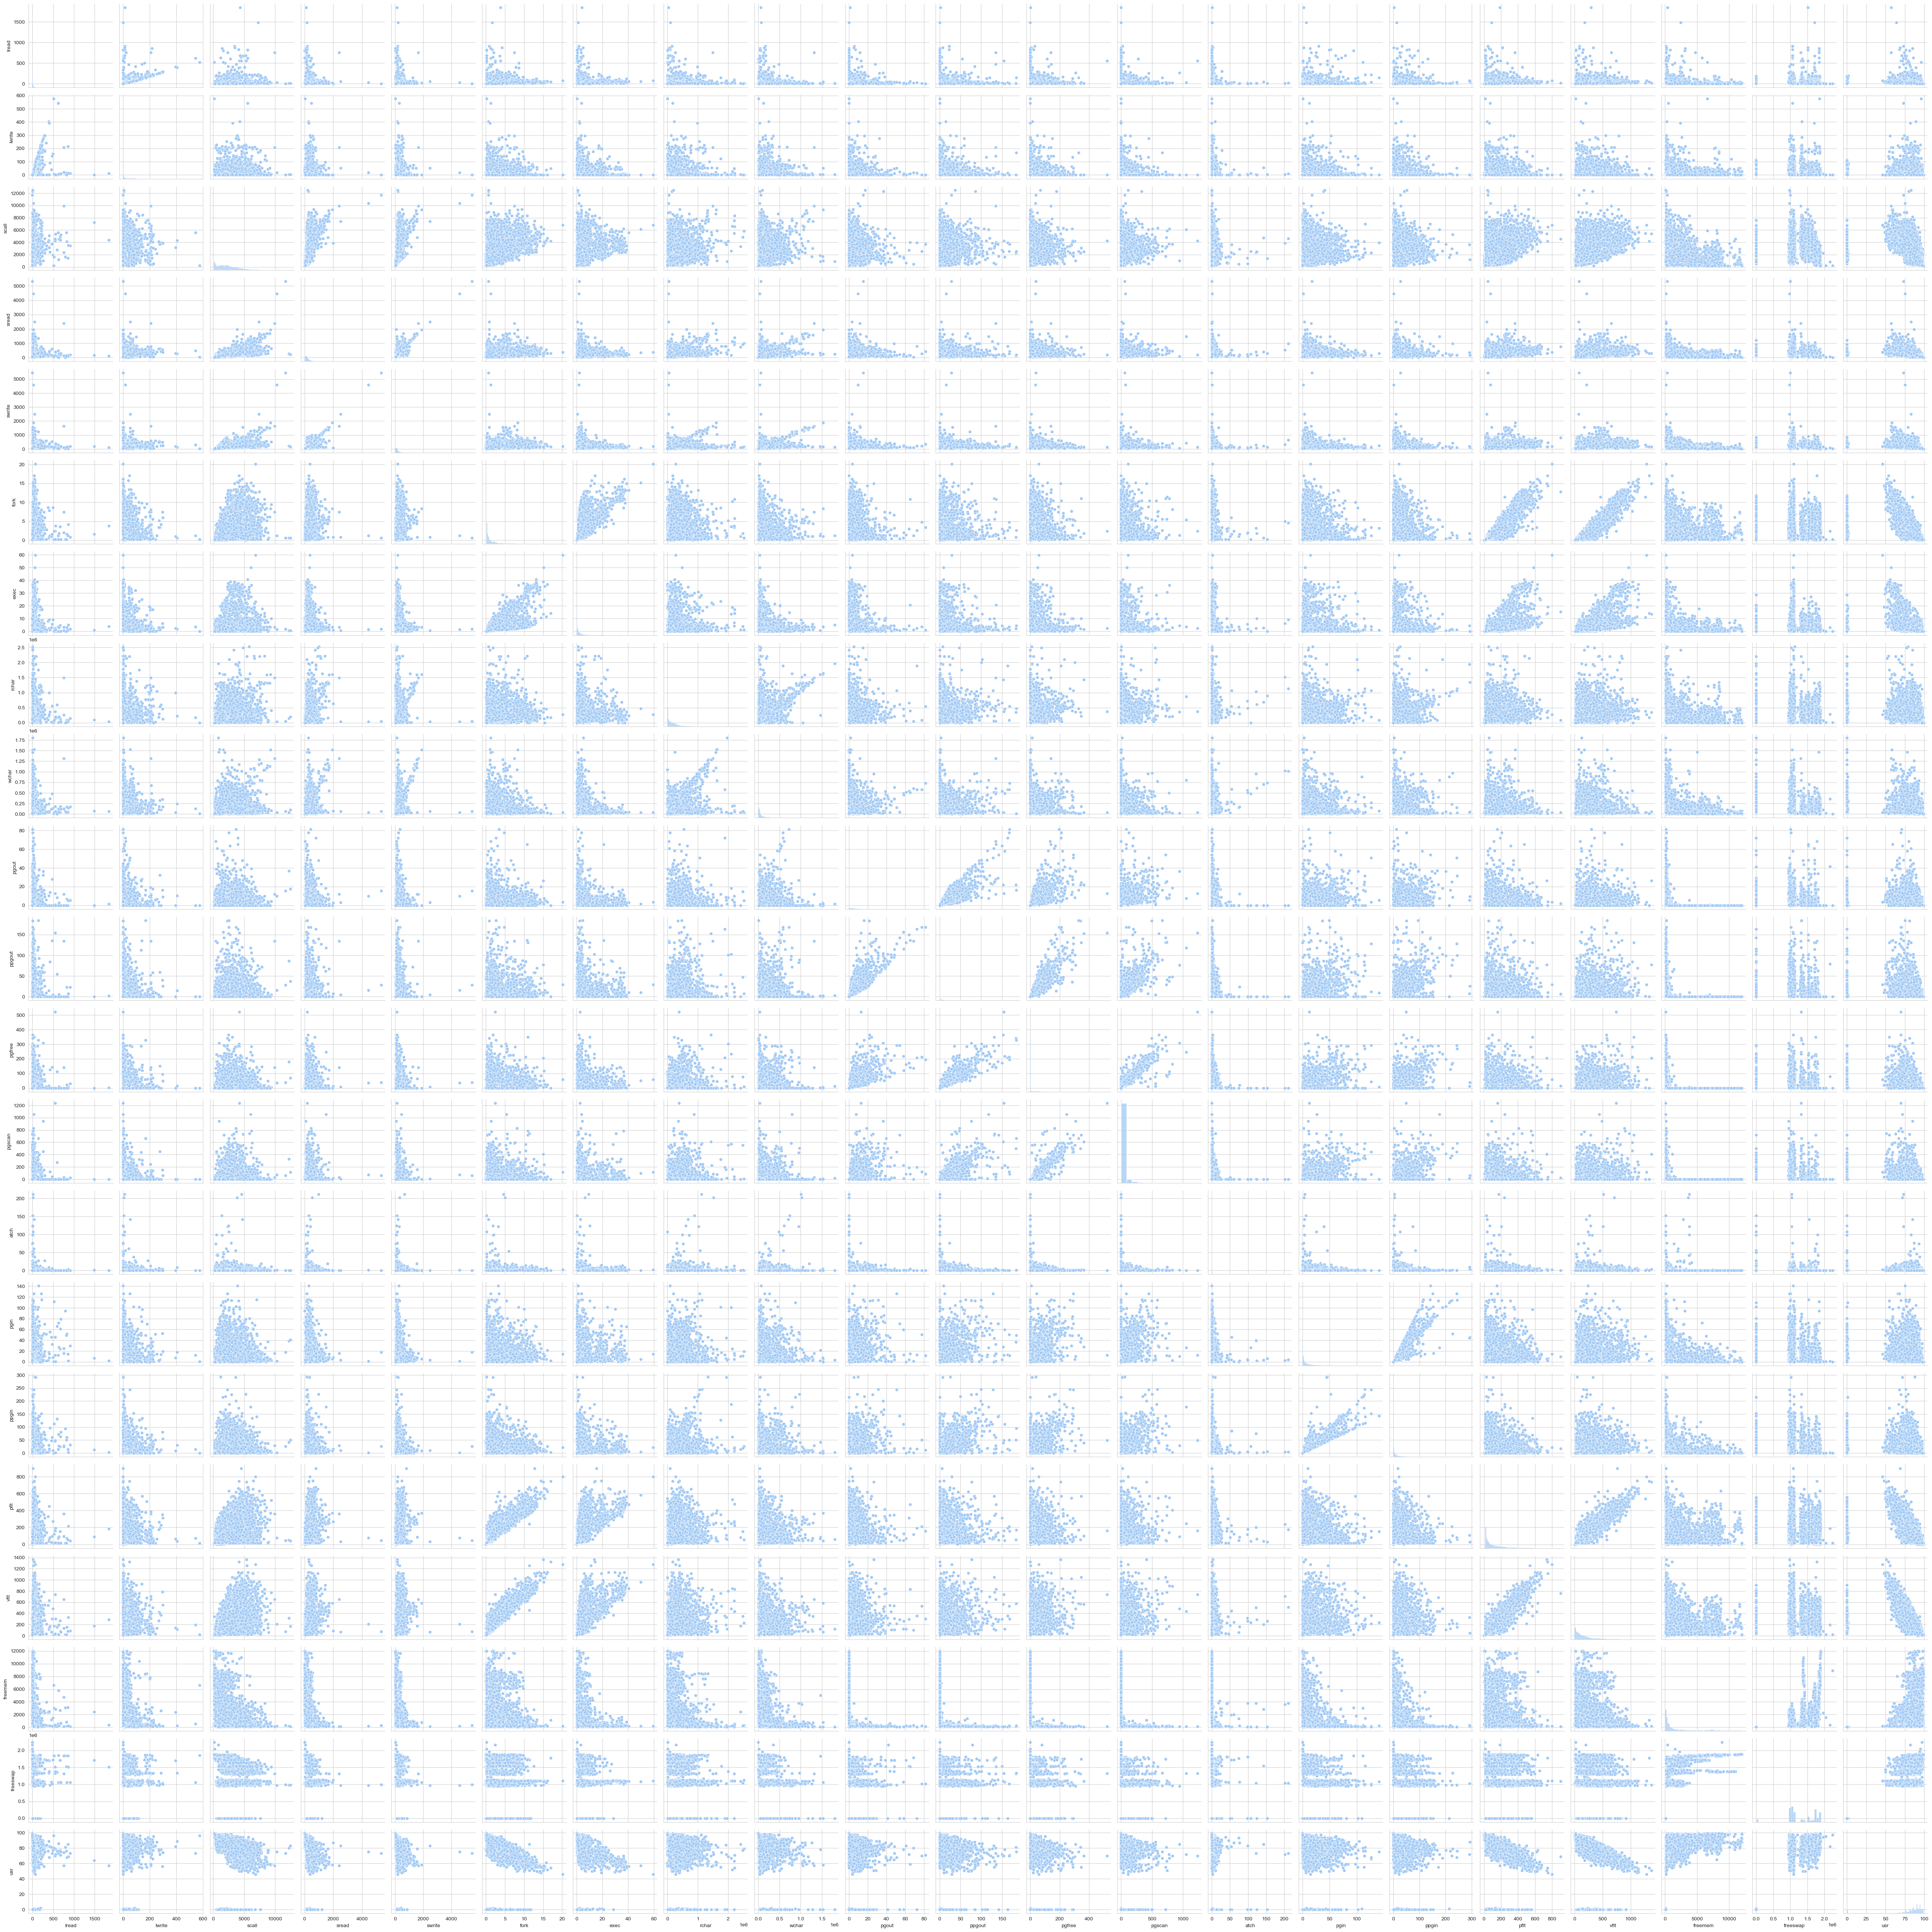

In [345]:
sns.pairplot(data=comp);

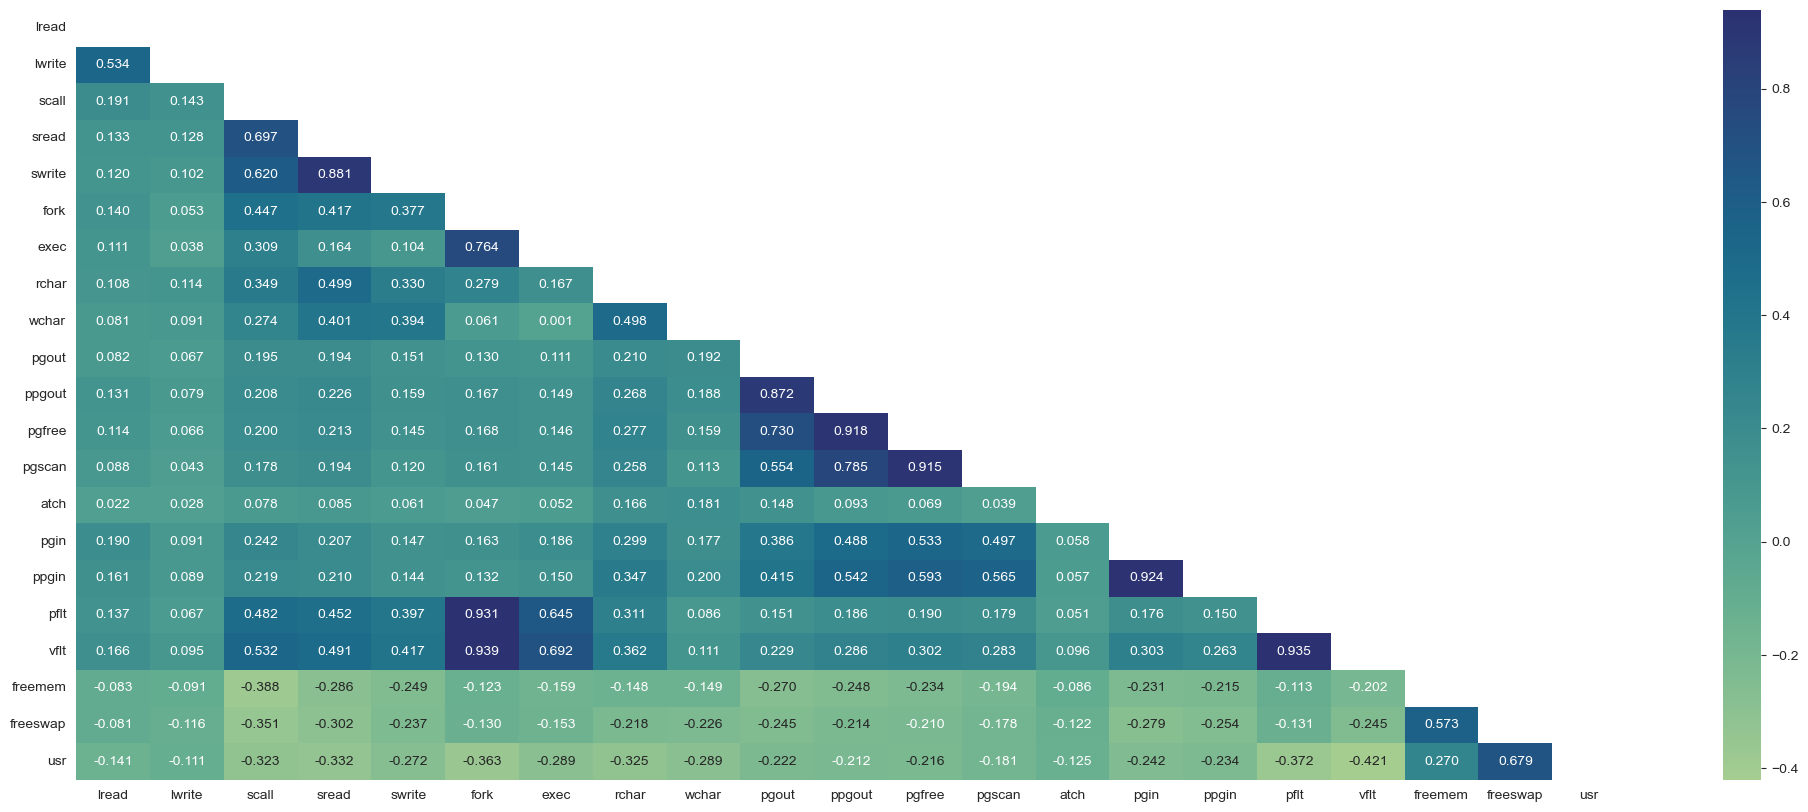

In [346]:
sns.set_palette='pastel'
plt.figure(figsize=(25,10))
mask=np.triu(np.ones_like(comp.corr(),dtype=bool))
sns.heatmap(comp.corr(), annot=True, fmt='.3f',cmap='crest', mask=mask);

#### Multivariate Analysis

<AxesSubplot:xlabel='freeswap', ylabel='usr'>

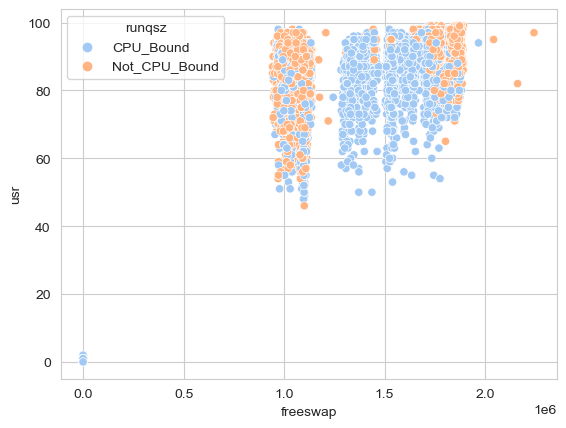

In [347]:
sns.scatterplot(x=comp['freeswap'],y=comp['usr'],hue=comp['runqsz'])

In [348]:
comp=pd.get_dummies(comp,columns=['runqsz'],drop_first=True)

## Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

Observations:
- The fields 'rchar' and 'wchar' have NaN values. These represent the number of characters transferred during system read and write calls. 
- Based on domain knowledge, it is plausible that either of these can be 0, but not both 0 for a given datapoint. So, on further exploration we find that atleast one of these is non zero for all datapoints. So, as such, there is no missing data and hence are imputed with 0 
- There are no bad values in the dataset
- Some fields have outliers
- There are no duplicate values

### Feature Engineering

In [349]:
comp_new=comp.copy()

In [350]:
comp_new

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
0         1       0   2147     79      68   0.2  0.20   40671.0  53995.0   
1         0       0    170     18      21   0.2  0.20     448.0   8385.0   
2        15       3   2162    159     119   2.0  2.40       0.0  31950.0   
3         0       0    160     12      16   0.2  0.20       0.0   8670.0   
4         5       1    330     39      38   0.4  0.40       0.0  12185.0   
...     ...     ...    ...    ...     ...   ...   ...       ...      ...   
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt  freemem  \
0      0.00  ...    0.00   0.0   1.60   2.60   16.00   26.40     4670   
1      0.00  ...    0.00   0.0   0.00   0.00   15.63   16.83     7278   
2      0.00  ...    0.00   1.2   6.00   9.40  150.20  220.20      702   
3      0.00  ...    0.00   0.0   0.20   0.20   15.60   16.80     7248   
4      0.00  ...    0.00   0.0   1.00   1.20   37.80   47.60      633   
...     ...  ...     ...   ...    ...    ...     ...     ...      ...   
8187   8.02  ...   55.11   0.6  35.87  47.90  139.28  270.74      387   
8188   3.80  ...    0.20   0.8   3.80   4.40  122.40  212.60      263   
8189   0.40  ...    0.00   0.4  28.40  45.20   60.20  219.80      400   
8190   1.40  ...   18.04   0.4  23.05  24.25   93.19  202.81      141   
8191   0.00  ...    0.00   0.2   3.40   6.20   91.80  110.00      659   

      freeswap  usr  runqsz_Not_CPU_Bound  
0      1730946   95                     0  
1      1869002   97                     1  
2      1021237   87                     1  
3      1863704   98                     1  
4      1760253   90                     1  
...        ...  ...                   ...  
8187    986647   80                     0  
8188   1055742   90                     1  
8189    969106   87                     1  
8190   1022458   83                     0  
8191   1756514   94                     0  

[8192 rows x 22 columns]

In [351]:
comp_new['Total_io']=comp_new['lread']+comp_new['lwrite']
comp_new['Total_disk_io']=comp_new['sread']+comp_new['swrite']
comp_new['Total_pg']=comp_new['pgin']+comp_new['pgout']+comp_new['ppgin']+comp_new['ppgout']+comp_new['pgfree']+comp_new['pgscan']+comp_new['pflt']+comp_new['vflt']+comp_new['atch']
comp_new['Total_proc']=comp_new['fork']+comp_new['exec']
comp_new['Disk_mem_usage']=comp_new['freemem']+comp_new['freeswap']
comp_new['Total_scalls']=comp_new['scall']+comp_new['fork']+comp_new['exec']
comp_new['Char_total']=comp_new['rchar']+comp_new['wchar']
comp_new['io_scall_ratio']=comp_new['Total_io']/comp_new['Total_scalls']
comp_new['Total_pg_faults']=comp_new['pflt']+comp_new['vflt']

In [352]:
comp_new

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
0         1       0   2147     79      68   0.2  0.20   40671.0  53995.0   
1         0       0    170     18      21   0.2  0.20     448.0   8385.0   
2        15       3   2162    159     119   2.0  2.40       0.0  31950.0   
3         0       0    160     12      16   0.2  0.20       0.0   8670.0   
4         5       1    330     39      38   0.4  0.40       0.0  12185.0   
...     ...     ...    ...    ...     ...   ...   ...       ...      ...   
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  runqsz_Not_CPU_Bound  Total_io  Total_disk_io  Total_pg  \
0      0.00  ...                     0         1            147     46.60   
1      0.00  ...                     1         0             39     32.46   
2      0.00  ...                     1        18            278    387.00   
3      0.00  ...                     1         0             28     32.80   
4      0.00  ...                     1         6             77     87.60   
...     ...  ...                   ...       ...            ...       ...   
8187   8.02  ...                     0        28            604    621.85   
8188   3.80  ...                     1         4            316    357.60   
8189   0.40  ...                     1        21            479    355.60   
8190   1.40  ...                     0        77            433    377.77   
8191   0.00  ...                     0         2            101    211.60   

      Total_proc  Disk_mem_usage  Total_scalls  Char_total  io_scall_ratio  \
0           0.40         1735616       2147.40     94666.0        0.000466   
1           0.40         1876280        170.40      8833.0        0.000000   
2           4.40         1021939       2166.40     31950.0        0.008309   
3           0.40         1870952        160.40      8670.0        0.000000   
4           0.80         1760886        330.80     12185.0        0.018138   
...          ...             ...           ...         ...             ...   
8187        7.41          987034       3016.41    490532.0        0.009283   
8188        4.20         1056005       1600.20    131253.0        0.002500   
8189        1.20          969506       3117.20    378588.0        0.006737   
8190        2.40         1022599       5182.40     92076.0        0.014858   
8191        6.40         1757173        991.40    133367.0        0.002017   

      Total_pg_faults  
0               42.40  
1               32.46  
2              370.40  
3               32.40  
4               85.40  
...               ...  
8187           410.02  
8188           335.00  
8189           280.00  
8190           296.00  
8191           201.80  

[8192 rows x 31 columns]

In [353]:
comp_new=comp_new.drop(['lread','lwrite','sread','swrite','pgin','pgout','ppgin','ppgout','pgfree','pgscan','freemem','freeswap','rchar','wchar','scall','fork','exec','atch','pflt','vflt'],axis=1)

In [354]:
comp_new

usr  runqsz_Not_CPU_Bound  Total_io  Total_disk_io  Total_pg  \
0      95                     0         1            147     46.60   
1      97                     1         0             39     32.46   
2      87                     1        18            278    387.00   
3      98                     1         0             28     32.80   
4      90                     1         6             77     87.60   
...   ...                   ...       ...            ...       ...   
8187   80                     0        28            604    621.85   
8188   90                     1         4            316    357.60   
8189   87                     1        21            479    355.60   
8190   83                     0        77            433    377.77   
8191   94                     0         2            101    211.60   

      Total_proc  Disk_mem_usage  Total_scalls  Char_total  io_scall_ratio  \
0           0.40         1735616       2147.40     94666.0        0.000466   
1           0.40         1876280        170.40      8833.0        0.000000   
2           4.40         1021939       2166.40     31950.0        0.008309   
3           0.40         1870952        160.40      8670.0        0.000000   
4           0.80         1760886        330.80     12185.0        0.018138   
...          ...             ...           ...         ...             ...   
8187        7.41          987034       3016.41    490532.0        0.009283   
8188        4.20         1056005       1600.20    131253.0        0.002500   
8189        1.20          969506       3117.20    378588.0        0.006737   
8190        2.40         1022599       5182.40     92076.0        0.014858   
8191        6.40         1757173        991.40    133367.0        0.002017   

      Total_pg_faults  
0               42.40  
1               32.46  
2              370.40  
3               32.40  
4               85.40  
...               ...  
8187           410.02  
8188           335.00  
8189           280.00  
8190           296.00  
8191           201.80  

[8192 rows x 11 columns]

In [355]:
comp_new.describe().round(2).T

count        mean        std    min         25%  \
usr                   8192.0       83.97      18.40    0.0       81.00   
runqsz_Not_CPU_Bound  8192.0        0.53       0.50    0.0        0.00   
Total_io              8192.0       32.67      73.77    0.0        2.00   
Total_disk_io         8192.0      360.54     348.73   13.0      154.00   
Total_pg              8192.0      358.61     367.20    0.2       87.60   
Total_proc            8192.0        4.68       7.28    0.0        0.60   
Disk_mem_usage        8192.0  1329889.42  423445.65   97.0  1043293.25   
Total_scalls          8192.0     2310.99    1636.35  109.0     1015.00   
Char_total            8192.0   290607.24  332654.14    0.0    74828.75   
io_scall_ratio        8192.0        0.02       0.07    0.0        0.00   
Total_pg_faults       8192.0      295.11     300.76    0.2       75.75   

                             50%         75%         max  
usr                        89.00       94.00       99.00  
runqsz_Not_CPU_Bound        1.00        1.00        1.00  
Total_io                    8.00       31.00     1858.00  
Total_disk_io             285.00      469.25    10774.00  
Total_pg                  233.60      498.19     2959.00  
Total_proc                  2.20        5.20       79.68  
Disk_mem_usage        1289562.50  1731933.25  2252088.00  
Total_scalls             2055.18     3323.05    12494.40  
Char_total             191988.50   381251.25  3767147.00  
io_scall_ratio              0.00        0.01        5.39  
Total_pg_faults           188.79      404.10     2102.40

In [356]:
comp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   usr                   8192 non-null   int64  
 1   runqsz_Not_CPU_Bound  8192 non-null   uint8  
 2   Total_io              8192 non-null   int64  
 3   Total_disk_io         8192 non-null   int64  
 4   Total_pg              8192 non-null   float64
 5   Total_proc            8192 non-null   float64
 6   Disk_mem_usage        8192 non-null   int64  
 7   Total_scalls          8192 non-null   float64
 8   Char_total            8192 non-null   float64
 9   io_scall_ratio        8192 non-null   float64
 10  Total_pg_faults       8192 non-null   float64
dtypes: float64(6), int64(4), uint8(1)
memory usage: 648.1 KB


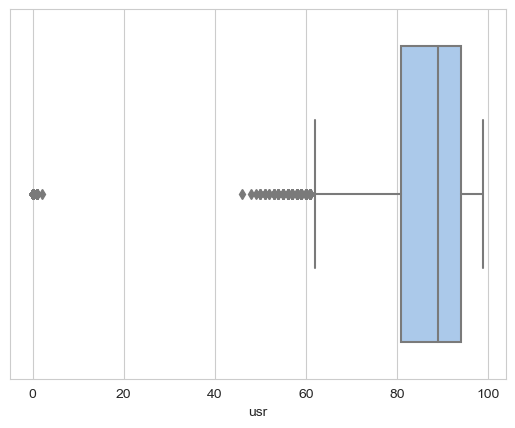

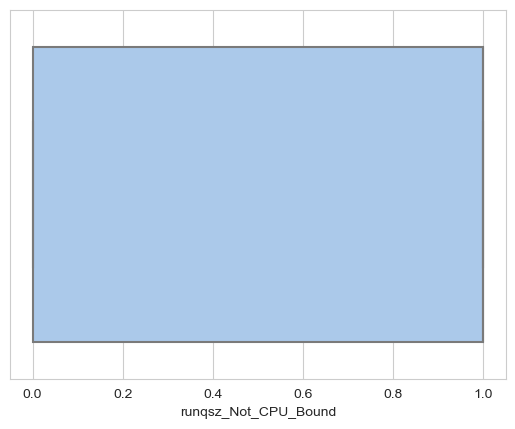

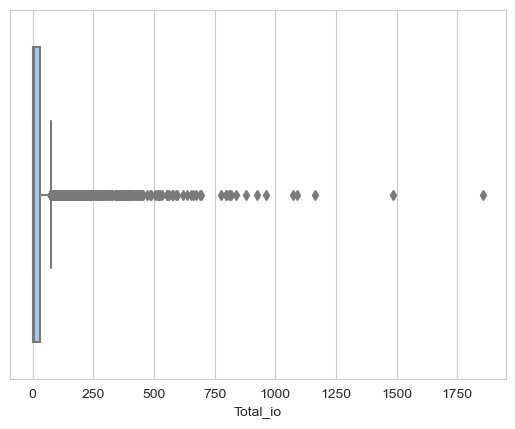

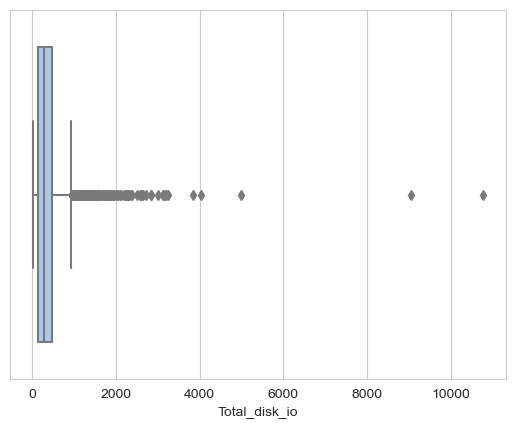

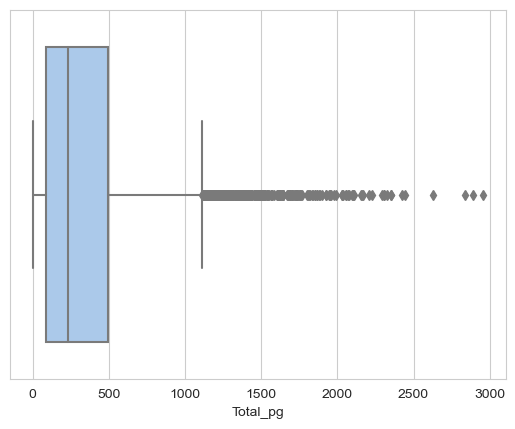

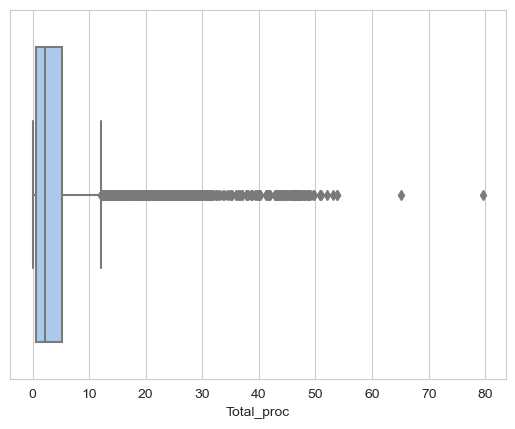

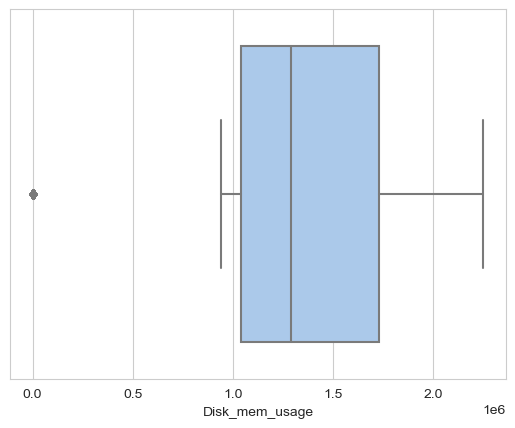

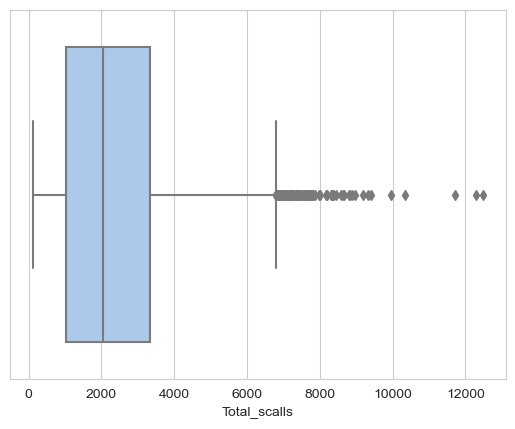

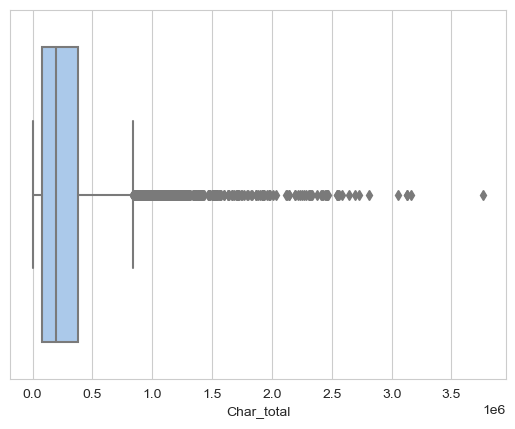

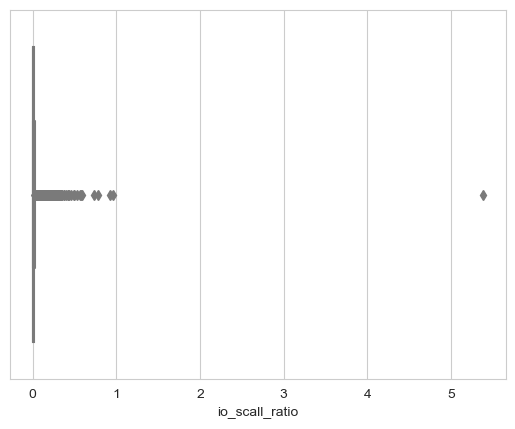

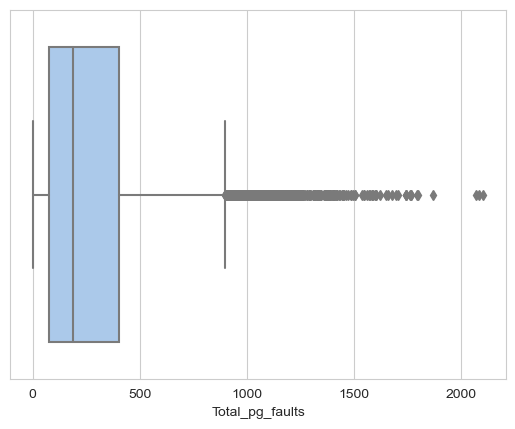

In [357]:
for i in comp_new.columns:
    sns.boxplot(x=comp_new[i])
    plt.show()

<AxesSubplot:>

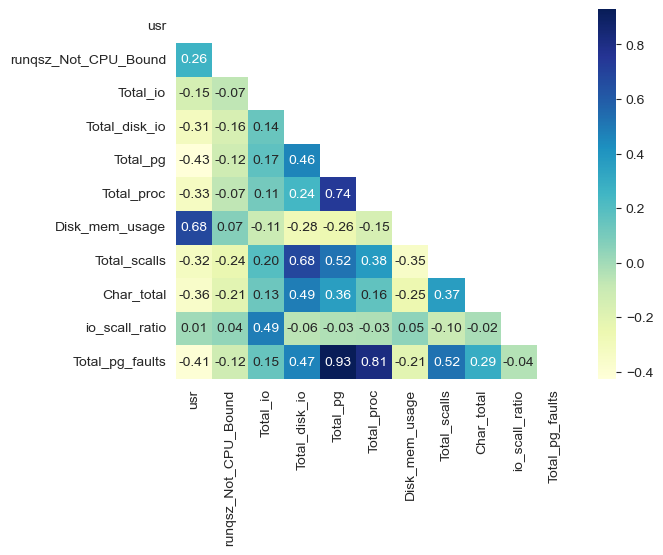

In [358]:
mask=np.triu(np.ones_like(comp_new.corr(),dtype='bool'))
sns.heatmap(comp_new.corr(),fmt='.2f',annot=True, mask=mask,cmap='YlGnBu')

### Outlier treatment

In [359]:
def treat_outlier(x):
    Q1=np.percentile(x,25)
    Q3=np.percentile(x,75)
    IQR=Q3-Q1
    ll=Q1-(1.5*IQR)
    ul=Q3+(1.5*IQR)
    return x.apply(lambda y:ll if y<ll else y).apply(lambda y:ul if y>ul else y)

In [360]:
comp_ol=pd.DataFrame(comp.copy())

In [361]:
for i in comp_ol:
    comp_ol[i]=treat_outlier(comp_ol[i])

In [362]:
comp_ol

lread  lwrite   scall  sread  swrite  fork  exec     rchar    wchar  \
0       1.0     0.0  2147.0   79.0    68.0   0.2  0.20   40671.0  53995.0   
1       0.0     0.0   170.0   18.0    21.0   0.2  0.20     448.0   8385.0   
2      15.0     3.0  2162.0  159.0   119.0   2.0  2.40       0.0  31950.0   
3       0.0     0.0   160.0   12.0    16.0   0.2  0.20       0.0   8670.0   
4       5.0     1.0   330.0   39.0    38.0   0.4  0.40       0.0  12185.0   
...     ...     ...     ...    ...     ...   ...   ...       ...      ...   
8187   16.0    12.0  3009.0  360.0   244.0   1.6  5.81  405250.0  85282.0   
8188    4.0     0.0  1596.0  170.0   146.0   2.4  1.80   89489.0  41764.0   
8189   16.0     5.0  3116.0  289.0   190.0   0.6  0.60  325948.0  52640.0   
8190   32.0    25.0  5180.0  254.0   179.0   1.2  1.20   62571.0  29505.0   
8191    2.0     0.0   985.0   55.0    46.0   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch     pgin  ppgin    pflt    vflt   freemem  \
0       0.0  ...     0.0   0.0   1.6000   2.60   16.00   26.40  4659.125   
1       0.0  ...     0.0   0.0   0.0000   0.00   15.63   16.83  4659.125   
2       0.0  ...     0.0   1.2   6.0000   9.40  150.20  220.20   702.000   
3       0.0  ...     0.0   0.0   0.2000   0.20   15.60   16.80  4659.125   
4       0.0  ...     0.0   0.0   1.0000   1.20   37.80   47.60   633.000   
...     ...  ...     ...   ...      ...    ...     ...     ...       ...   
8187    6.0  ...     0.0   0.6  23.5125  33.60  139.28  270.74   387.000   
8188    3.8  ...     0.0   0.8   3.8000   4.40  122.40  212.60   263.000   
8189    0.4  ...     0.0   0.4  23.5125  33.60   60.20  219.80   400.000   
8190    1.4  ...     0.0   0.4  23.0500  24.25   93.19  202.81   141.000   
8191    0.0  ...     0.0   0.2   3.4000   6.20   91.80  110.00   659.000   

       freeswap   usr  runqsz_Not_CPU_Bound  
0     1730946.0  95.0                     0  
1     1869002.0  97.0                     1  
2     1021237.0  87.0                     1  
3     1863704.0  98.0                     1  
4     1760253.0  90.0                     1  
...         ...   ...                   ...  
8187   986647.0  80.0                     0  
8188  1055742.0  90.0                     1  
8189   969106.0  87.0                     1  
8190  1022458.0  83.0                     0  
8191  1756514.0  94.0                     0  

[8192 rows x 22 columns]

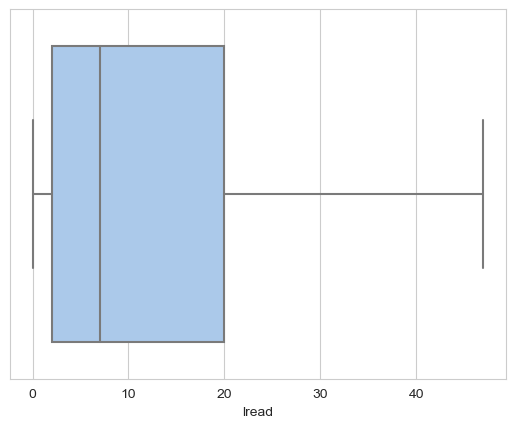

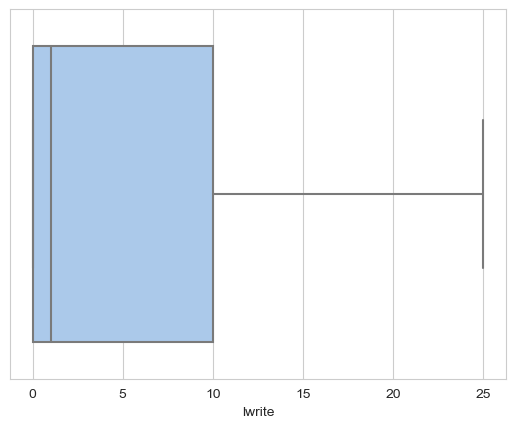

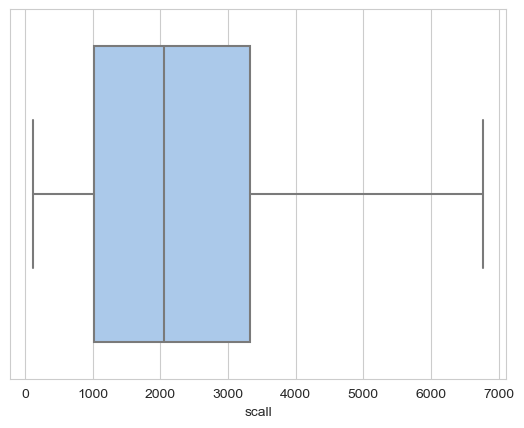

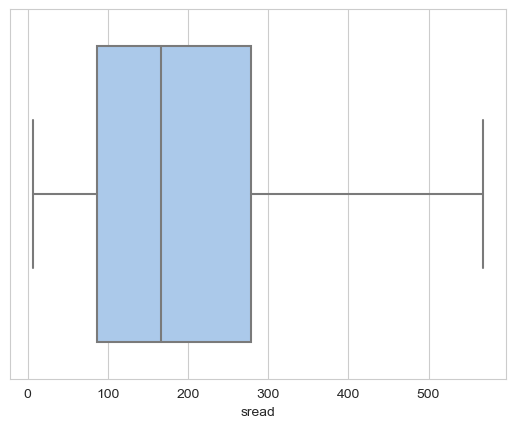

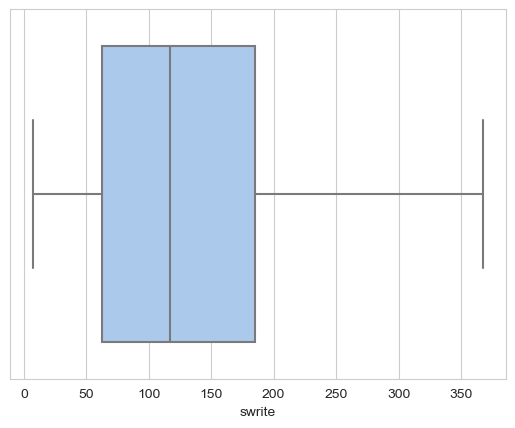

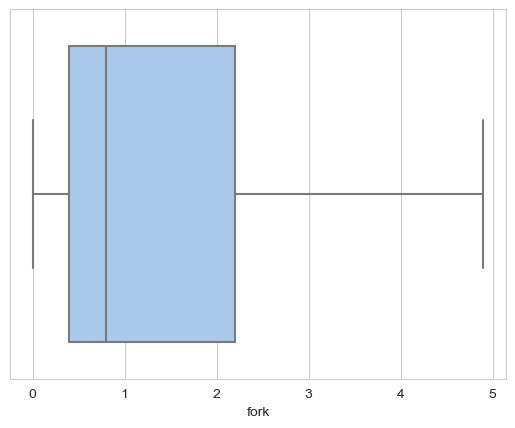

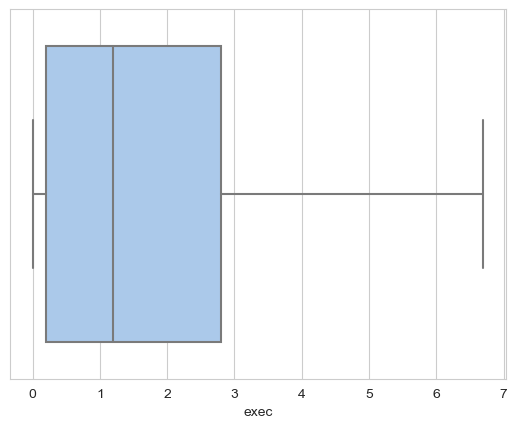

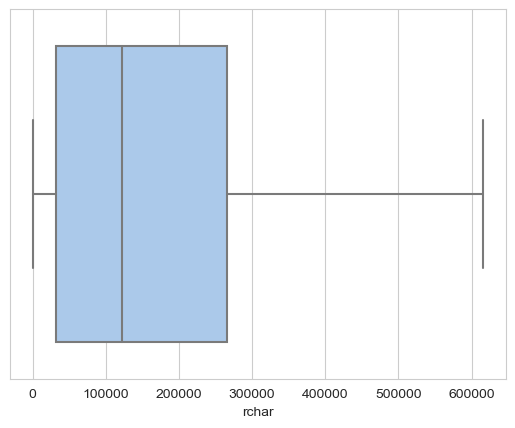

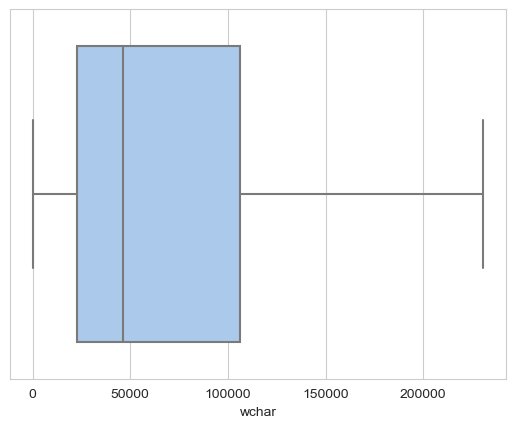

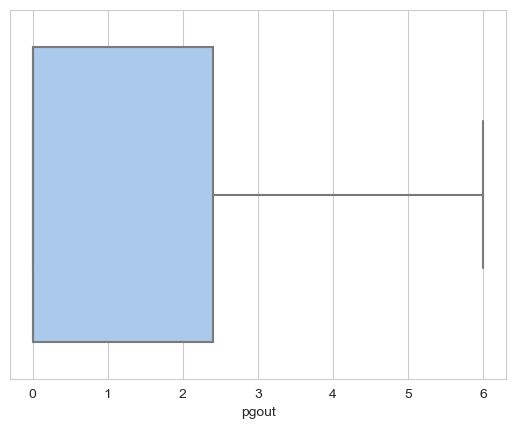

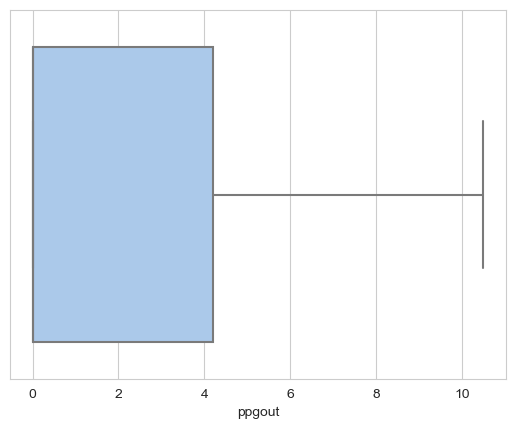

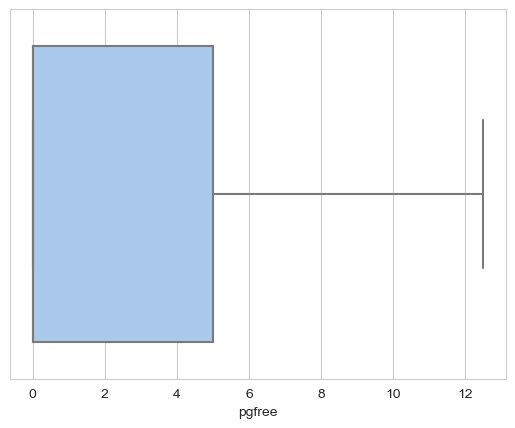

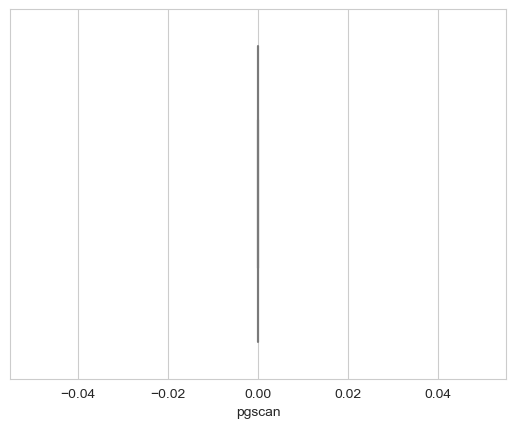

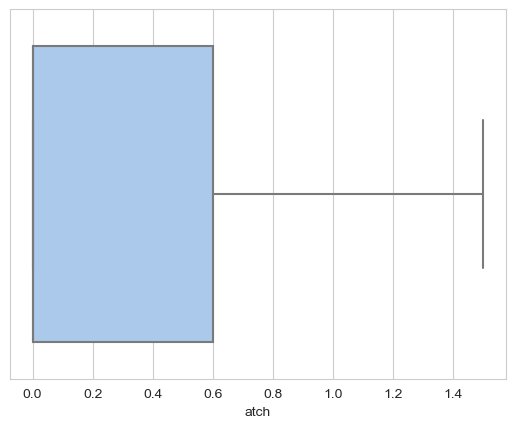

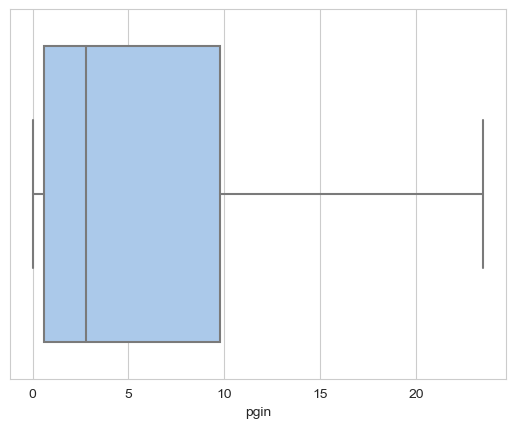

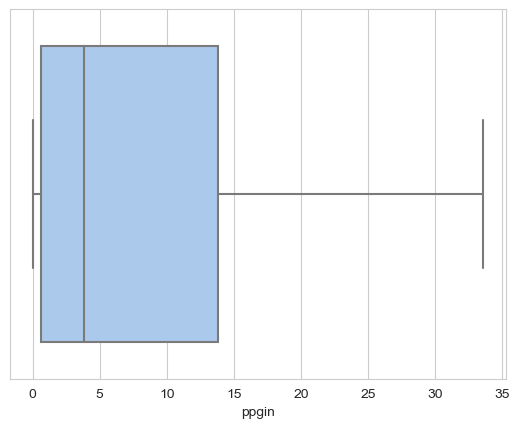

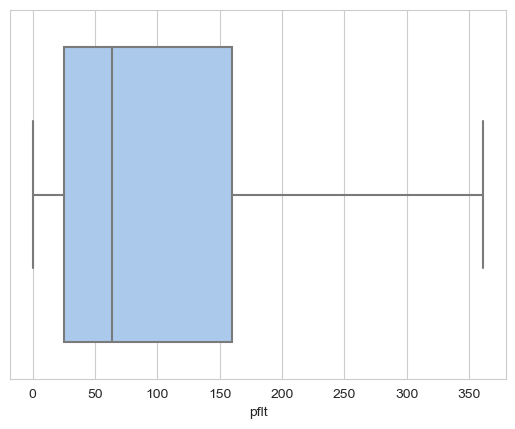

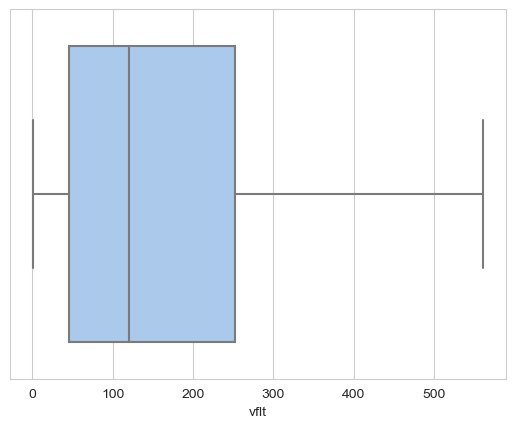

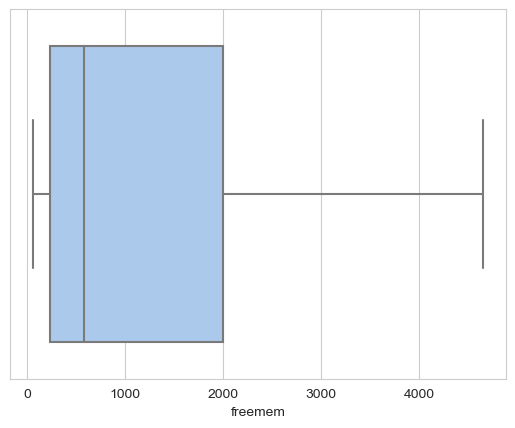

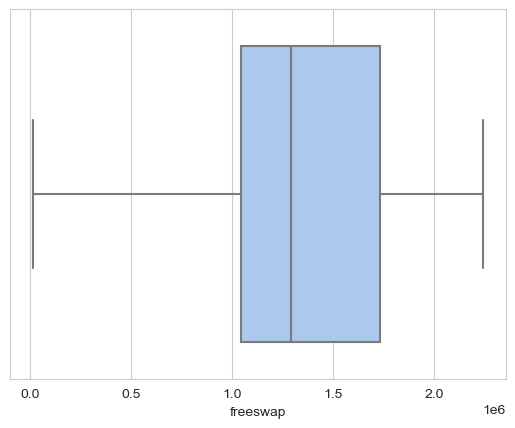

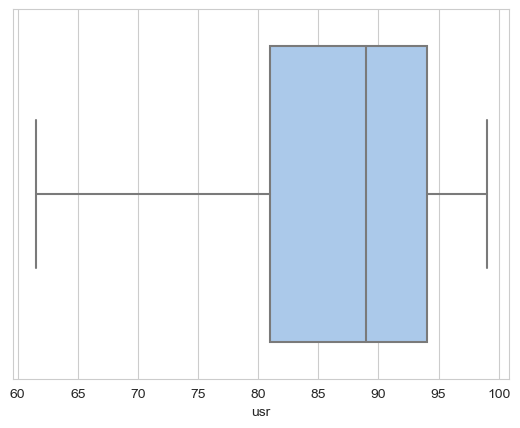

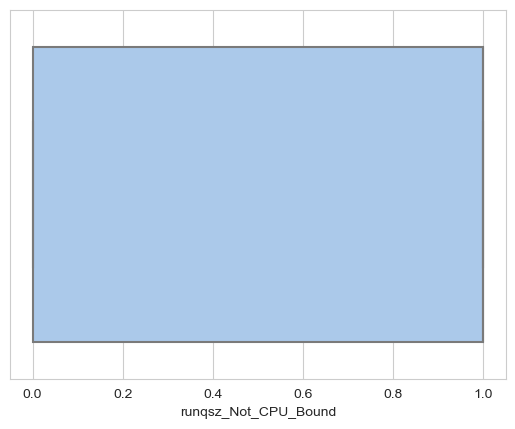

In [363]:
for i in comp_ol.columns:
    sns.boxplot(x=comp_ol[i])
    plt.show()

In [364]:
comp_new_ol=pd.DataFrame(comp_new.copy())

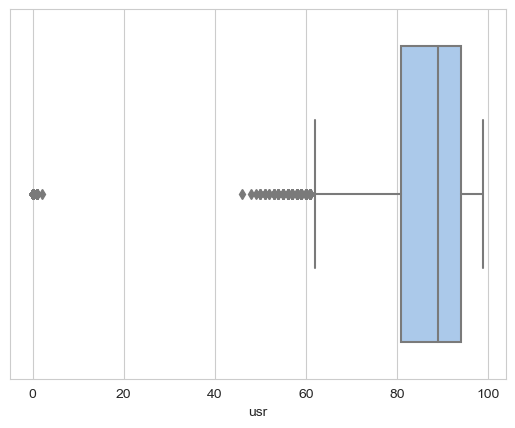

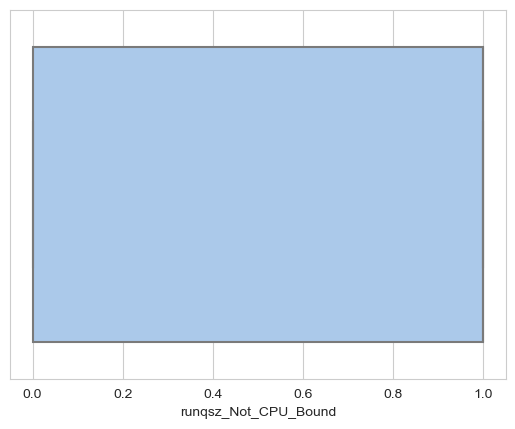

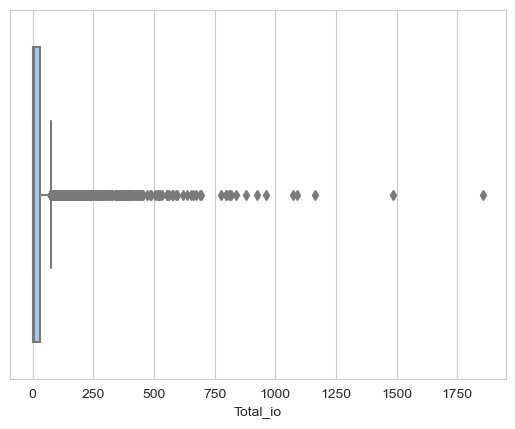

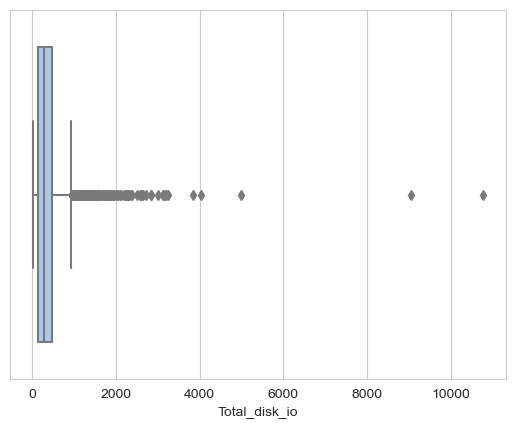

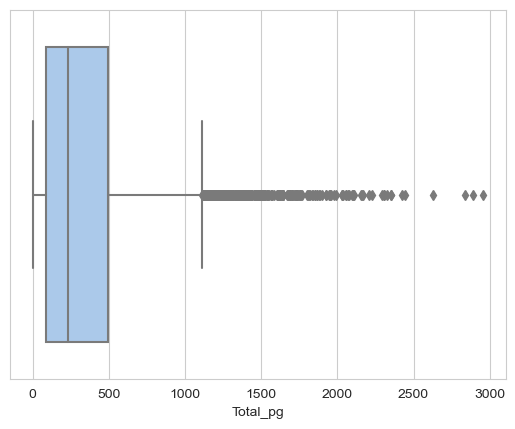

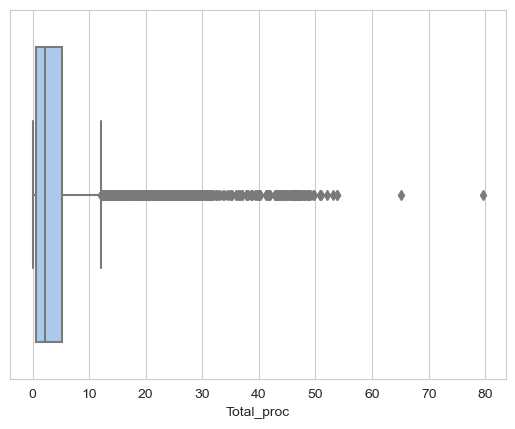

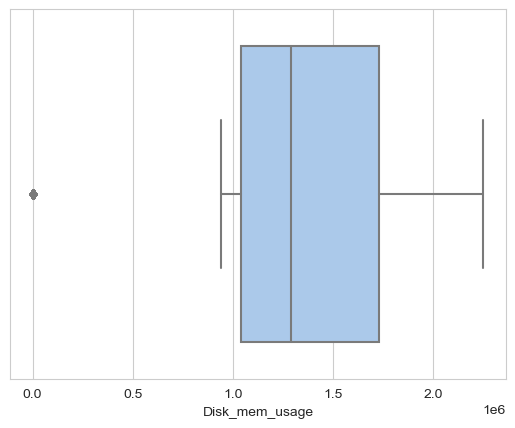

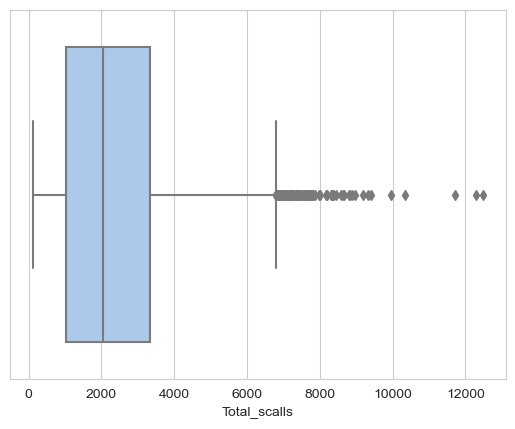

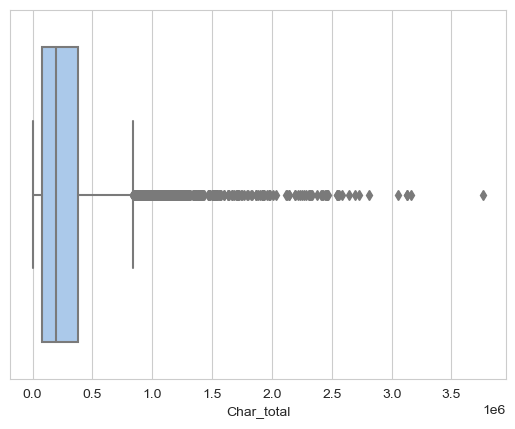

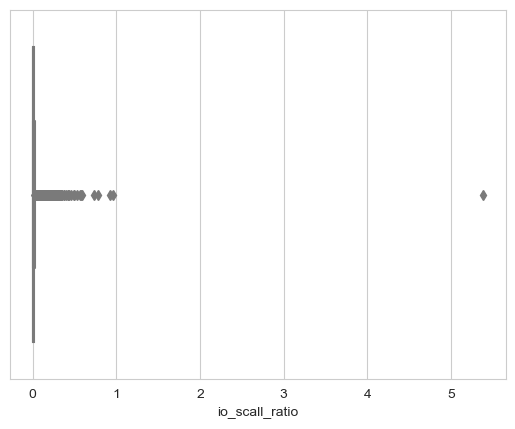

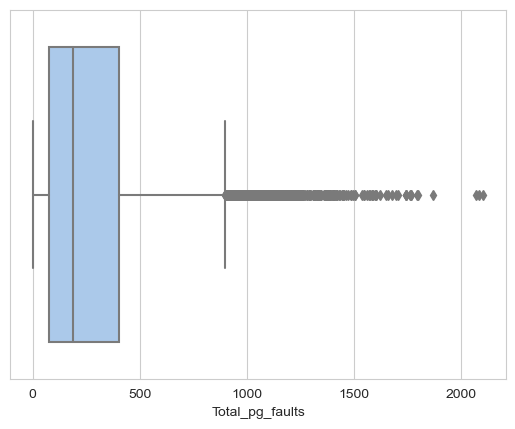

In [365]:
for i in comp_new.columns:
    sns.boxplot(x=comp_new[i])
    plt.show()

In [366]:
for i in comp_new_ol:
    comp_new_ol[i]=treat_outlier(comp_new_ol[i])

In [367]:
comp_new_ol

usr  runqsz_Not_CPU_Bound  Total_io  Total_disk_io  Total_pg  \
0     95.0                     0       1.0          147.0     46.60   
1     97.0                     1       0.0           39.0     32.46   
2     87.0                     1      18.0          278.0    387.00   
3     98.0                     1       0.0           28.0     32.80   
4     90.0                     1       6.0           77.0     87.60   
...    ...                   ...       ...            ...       ...   
8187  80.0                     0      28.0          604.0    621.85   
8188  90.0                     1       4.0          316.0    357.60   
8189  87.0                     1      21.0          479.0    355.60   
8190  83.0                     0      74.5          433.0    377.77   
8191  94.0                     0       2.0          101.0    211.60   

      Total_proc  Disk_mem_usage  Total_scalls  Char_total  io_scall_ratio  \
0           0.40       1735616.0       2147.40     94666.0        0.000466   
1           0.40       1876280.0        170.40      8833.0        0.000000   
2           4.40       1021939.0       2166.40     31950.0        0.008309   
3           0.40       1870952.0        160.40      8670.0        0.000000   
4           0.80       1760886.0        330.80     12185.0        0.018138   
...          ...             ...           ...         ...             ...   
8187        7.41        987034.0       3016.41    490532.0        0.009283   
8188        4.20       1056005.0       1600.20    131253.0        0.002500   
8189        1.20        969506.0       3117.20    378588.0        0.006737   
8190        2.40       1022599.0       5182.40     92076.0        0.014858   
8191        6.40       1757173.0        991.40    133367.0        0.002017   

      Total_pg_faults  
0               42.40  
1               32.46  
2              370.40  
3               32.40  
4               85.40  
...               ...  
8187           410.02  
8188           335.00  
8189           280.00  
8190           296.00  
8191           201.80  

[8192 rows x 11 columns]

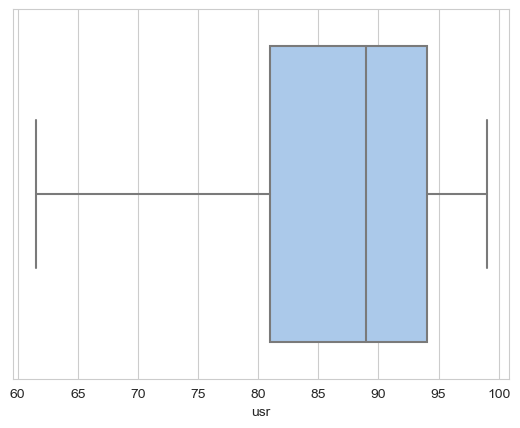

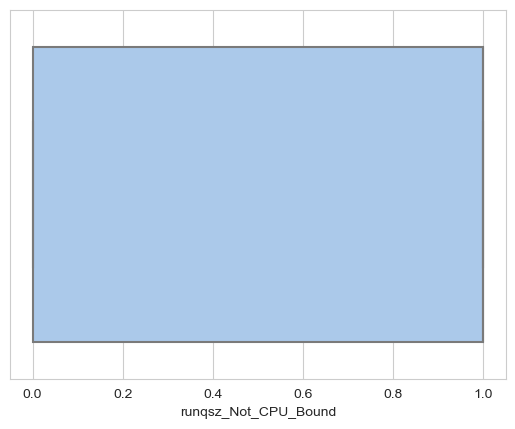

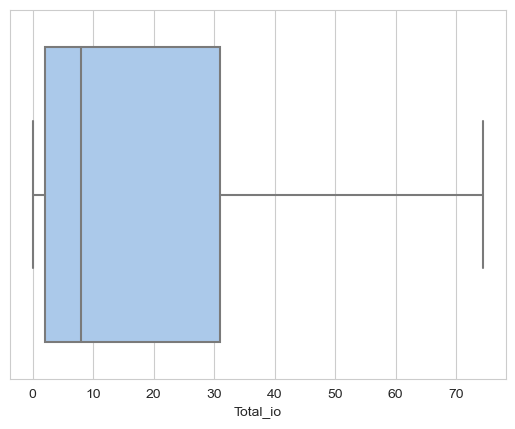

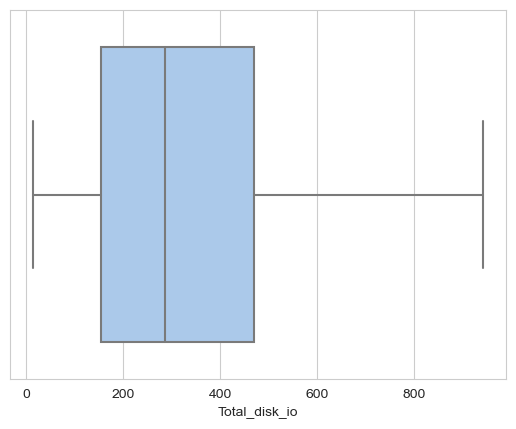

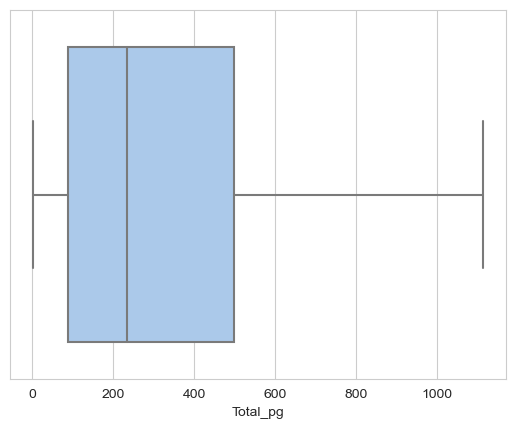

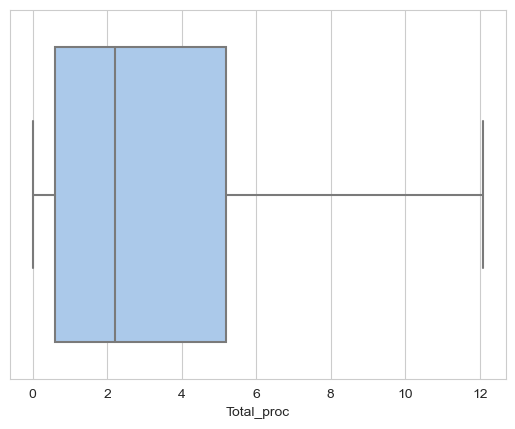

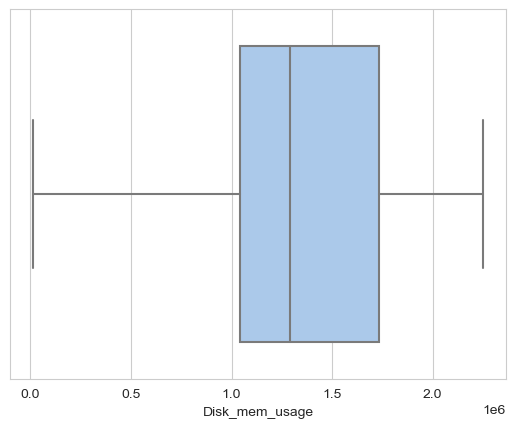

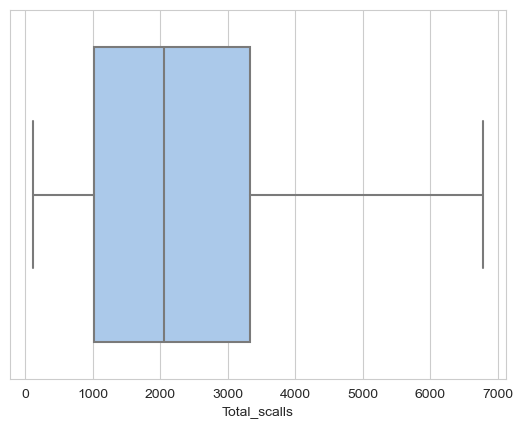

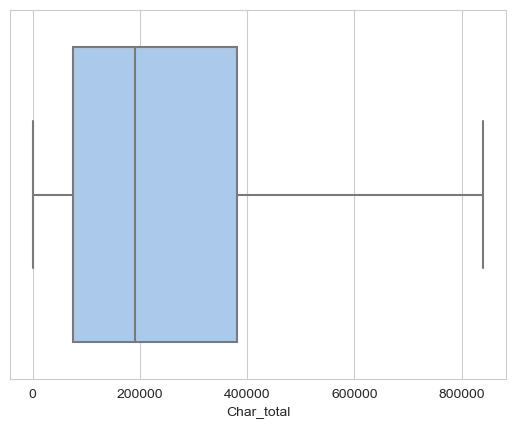

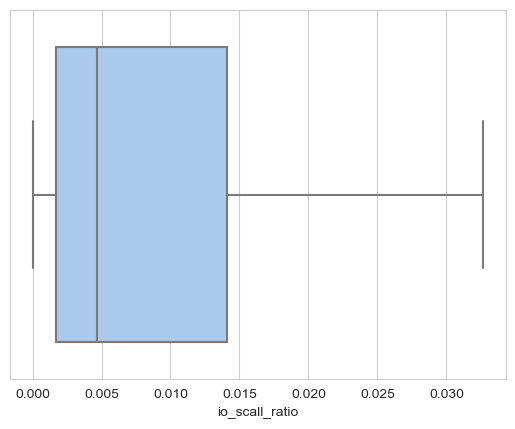

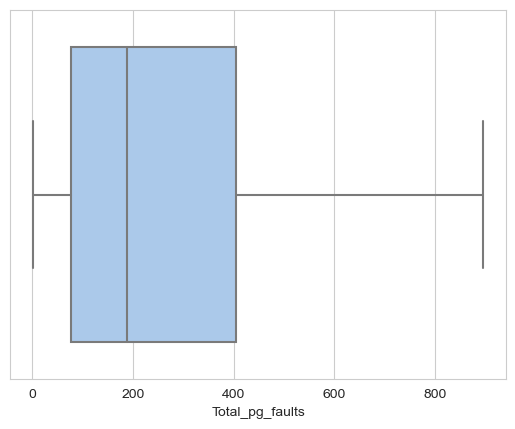

In [368]:
for i in comp_new_ol.columns:
    sns.boxplot(x=comp_new_ol[i])
    plt.show()

##  Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

### W/o outlier treatment w/o feature engg

#### Using sklearn

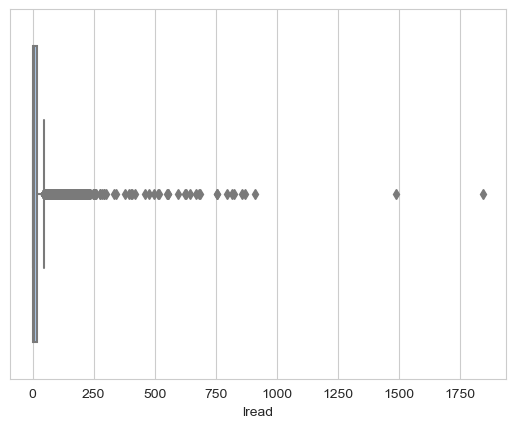

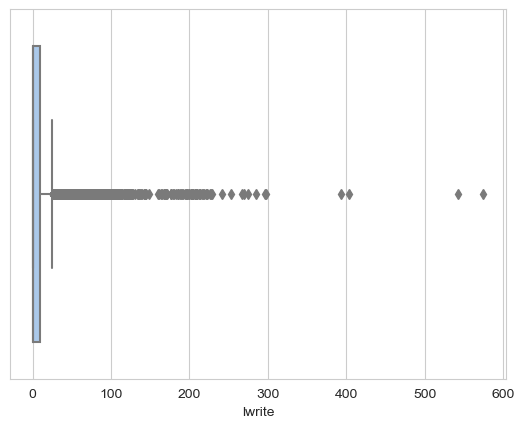

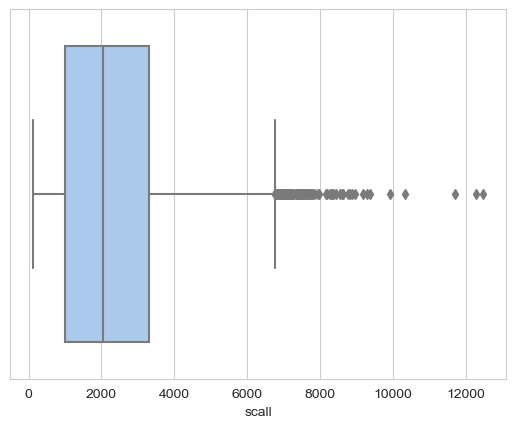

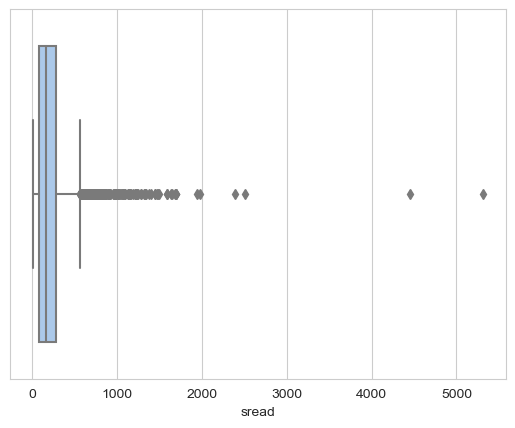

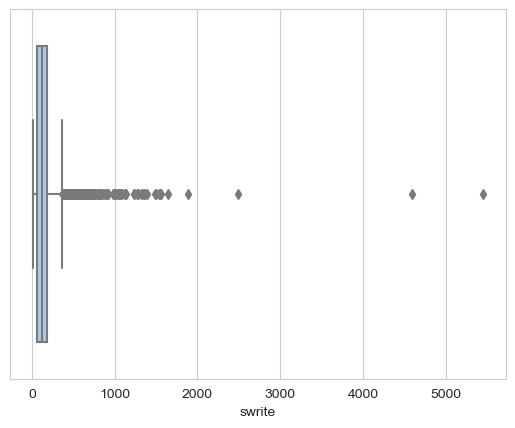

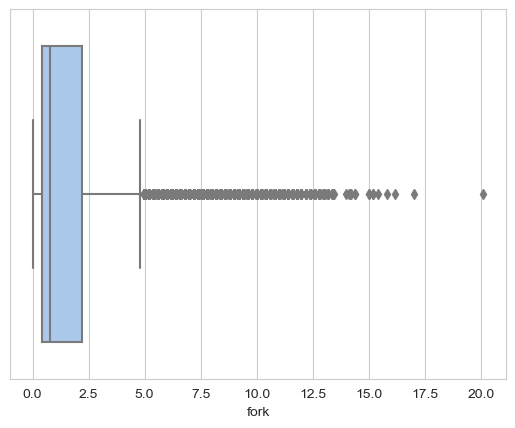

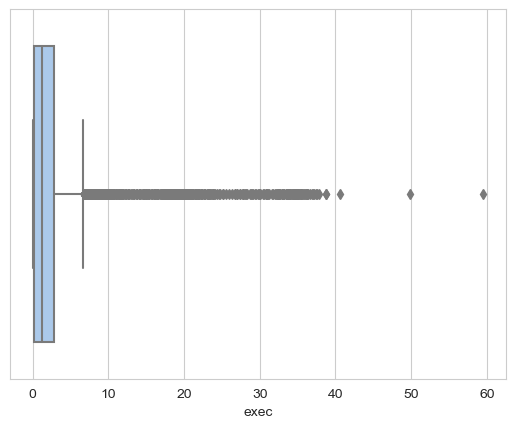

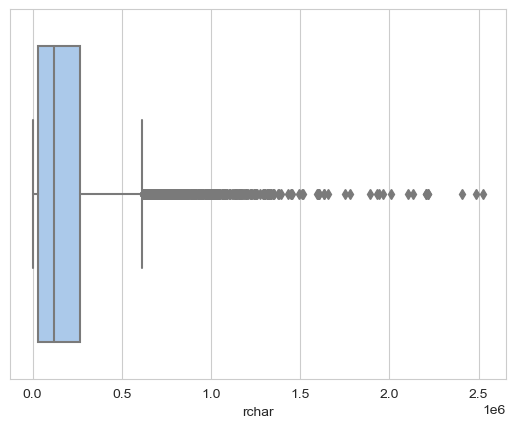

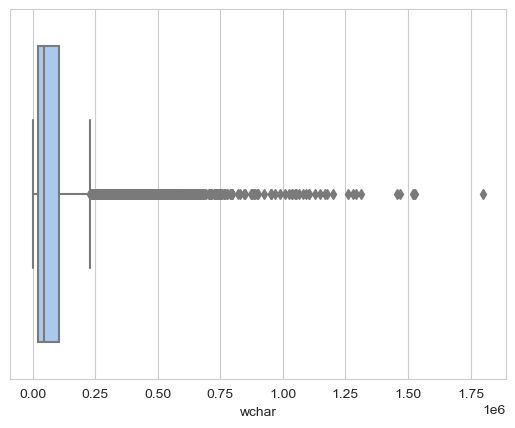

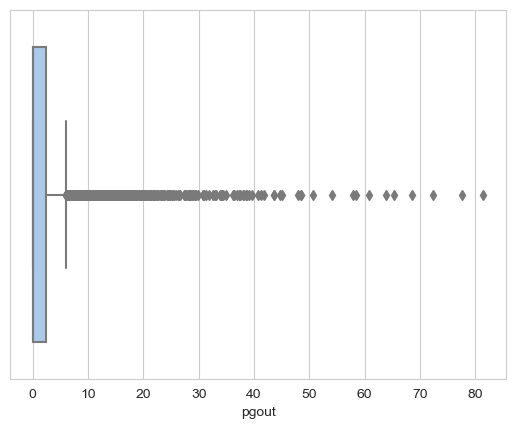

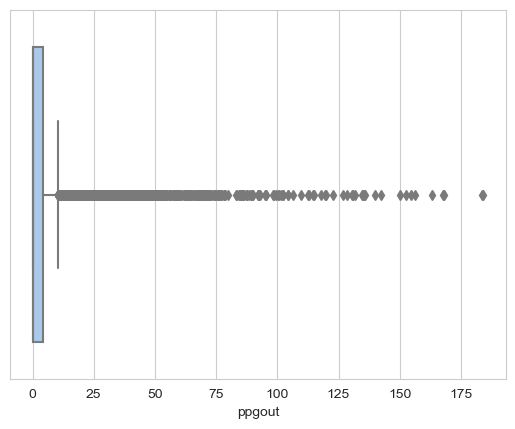

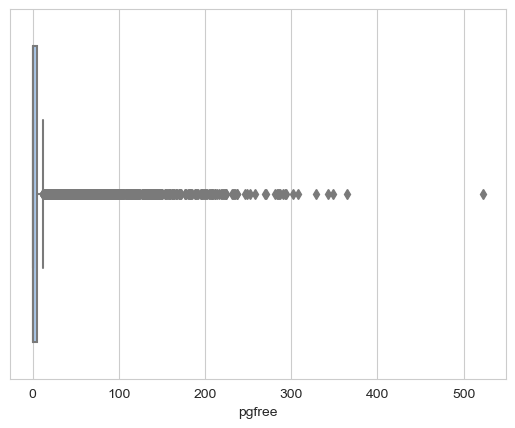

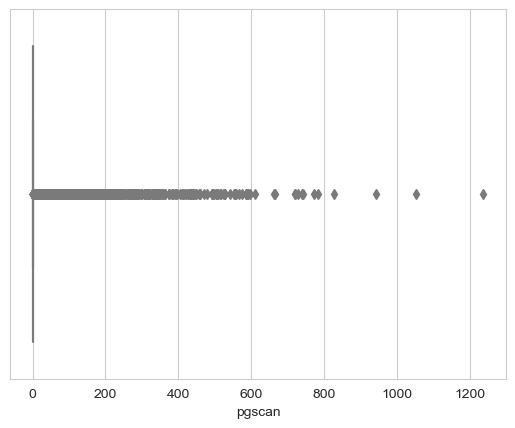

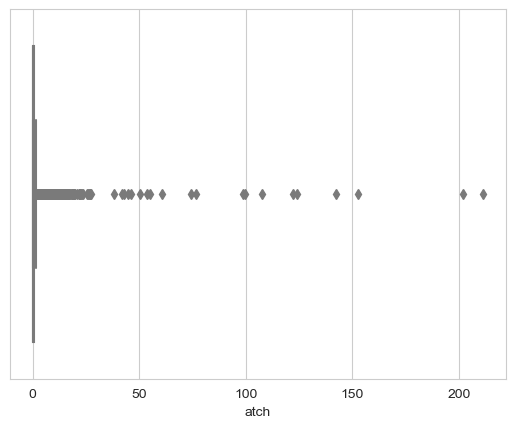

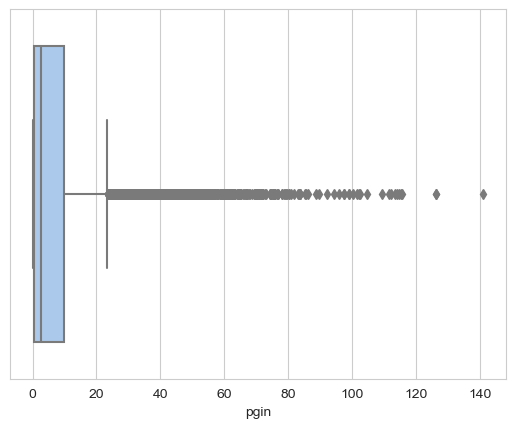

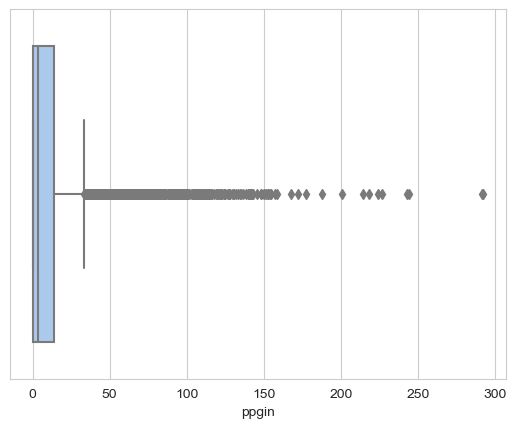

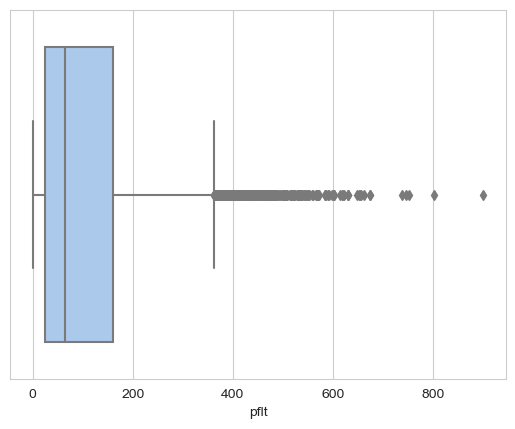

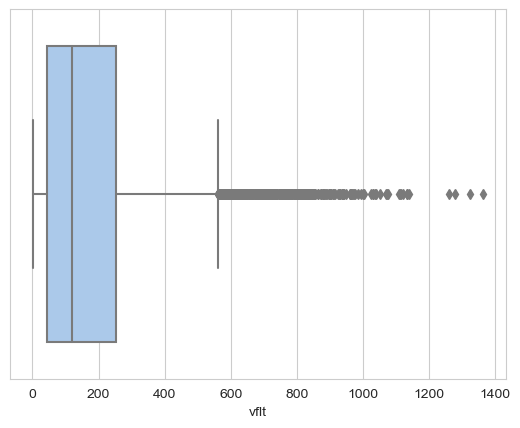

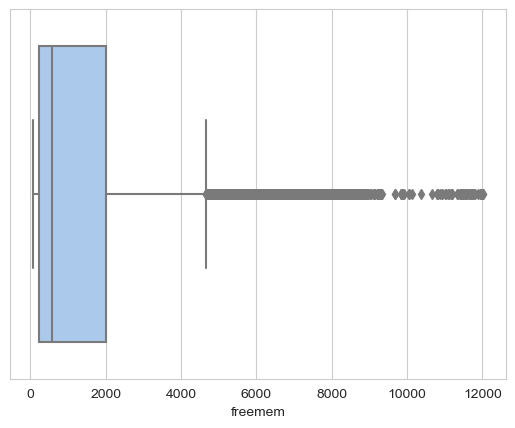

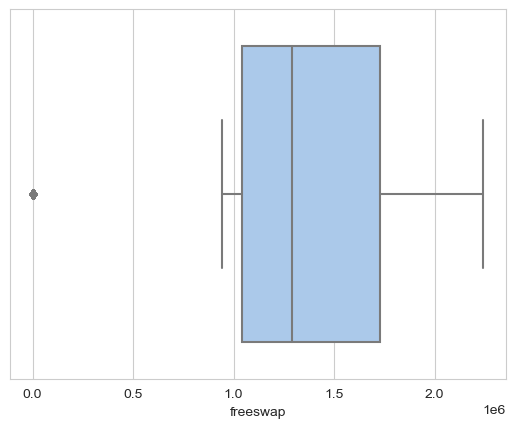

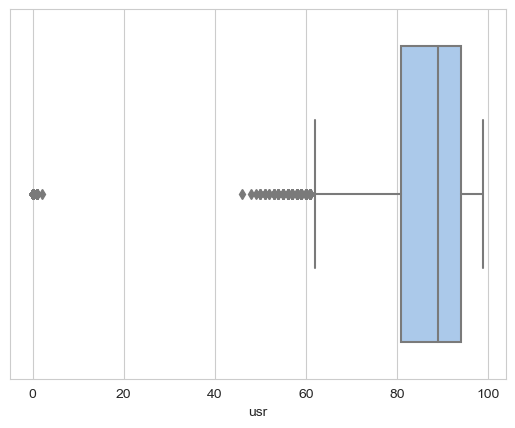

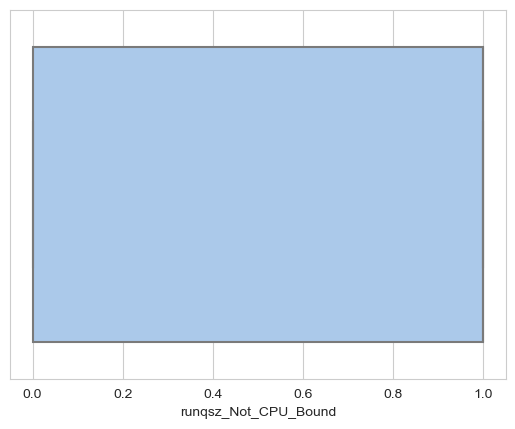

In [369]:
for i in comp.columns:
    sns.boxplot(comp[i])
    plt.show()

In [370]:
from sklearn.model_selection import train_test_split 

In [371]:
X1=comp.drop(['usr'],axis=1)
Y1=comp.usr

In [372]:
x1_train, x1_test, y1_train, y1_test= train_test_split(X1,Y1,test_size=0.3, random_state=123)

In [373]:
from sklearn.linear_model import LinearRegression

In [374]:
lr_model=LinearRegression()
lr_model.fit(x1_train,y1_train)

LinearRegression()

In [375]:
lr_model.score(x1_train,y1_train)

0.648266211978489

In [376]:
lr_model.score(x1_test,y1_test)

0.6126116501312313

In [377]:
#rmse
from sklearn.metrics import mean_squared_error

In [378]:
y1_predict=lr_model.predict(x1_test)
rmse=np.sqrt(mean_squared_error(y1_test,y1_predict))
rmse

10.62358613433477

#### Using statsmodel

In [400]:
import statsmodels.api as sm

In [408]:
X1_const= sm.add_constant(X1)

In [409]:
x1c_train, x1c_test, y1c_train, y1c_test= train_test_split(X1_const,Y1,test_size=0.3, random_state=123)

In [446]:
model1 = sm.OLS(y1c_train,x1c_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     501.3
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:24:31   Log-Likelihood:                -22005.
No. Observations:                5734   AIC:                         4.405e+04
Df Residuals:                    5712   BIC:                         4.420e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   40.9026      0.745     54.933      0.000      39.443      42.362
lread                   -0.0201      0.003     -6.305      0.000      -0.026      -0.014
lwrite                   0.0075      0.006      1.264      0.206      -0.004       0.019
scall                    0.0009      0.000      6.407      0.000       0.001       0.001
sread                    0.0007      0.002      0.338      0.735      -0.003       0.004
swrite                  -0.0013      0.002     -0.519      0.604      -0.006       0.004
fork                    -1.9586      0.262     -7.485      0.000      -2.472      -1.446
exec                    -0.0078      0.053     -0.147      0.883      -0.112       0.096
rchar                -3.428e-06   8.98e-07     -3.816      0.000   -5.19e-06   -1.67e-06
wchar                -8.835e-06   1.42e-06     -6.207      0.000   -1.16e-05   -6.04e-06
pgout                   -0.1918      0.063     -3.031      0.002      -0.316      -0.068
ppgout                   0.1466      0.037      4.000      0.000       0.075       0.218
pgfree                  -0.1051      0.019     -5.552      0.000      -0.142      -0.068
pgscan                   0.0161      0.006      2.843      0.004       0.005       0.027
atch                    -0.0527      0.024     -2.193      0.028      -0.100      -0.006
pgin                     0.0581      0.029      1.982      0.048       0.001       0.116
ppgin                   -0.0385      0.019     -2.042      0.041      -0.076      -0.002
pflt                    -0.0396      0.004     -9.157      0.000      -0.048      -0.031
vflt                     0.0225      0.003      6.538      0.000       0.016       0.029
freemem                 -0.0018   7.85e-05    -22.590      0.000      -0.002      -0.002
freeswap               3.45e-05   4.58e-07     75.394      0.000    3.36e-05    3.54e-05
runqsz_Not_CPU_Bound     8.2568      0.315     26.239      0.000       7.640       8.874
==============================================================================
Omnibus:                     1100.492   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2515.690
Skew:                          -1.090   Prob(JB):                         0.00
Kurtosis:                       5.404   Cond. No.                     7.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [517]:
model1_test = sm.OLS(y1c_test,x1c_test).fit()
model1_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     193.3
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:07:26   Log-Likelihood:                -9256.4
No. Observations:                2458   AIC:                         1.856e+04
Df Residuals:                    2436   BIC:                         1.868e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   47.9248      1.144     41.890      0.000      45.681      50.168
lread                   -0.0203      0.006     -3.383      0.001      -0.032      -0.009
lwrite                   0.0050      0.009      0.566      0.572      -0.012       0.022
scall                    0.0011      0.000      5.480      0.000       0.001       0.002
sread                   -0.0031      0.003     -1.051      0.293      -0.009       0.003
swrite                   0.0006      0.003      0.222      0.824      -0.005       0.006
fork                    -1.7321      0.352     -4.921      0.000      -2.422      -1.042
exec                    -0.1126      0.069     -1.640      0.101      -0.247       0.022
rchar                -3.792e-06   1.17e-06     -3.235      0.001   -6.09e-06   -1.49e-06
wchar                -1.482e-05   1.75e-06     -8.462      0.000   -1.83e-05   -1.14e-05
pgout                   -0.2301      0.105     -2.183      0.029      -0.437      -0.023
ppgout                   0.0723      0.059      1.232      0.218      -0.043       0.187
pgfree                  -0.0396      0.029     -1.369      0.171      -0.096       0.017
pgscan                   0.0025      0.009      0.291      0.771      -0.015       0.020
atch                     0.0785      0.074      1.060      0.289      -0.067       0.224
pgin                     0.0723      0.044      1.650      0.099      -0.014       0.158
ppgin                   -0.0524      0.028     -1.866      0.062      -0.107       0.003
pflt                    -0.0414      0.006     -6.469      0.000      -0.054      -0.029
vflt                     0.0234      0.005      5.006      0.000       0.014       0.033
freemem                 -0.0014      0.000    -12.758      0.000      -0.002      -0.001
freeswap              2.987e-05   6.92e-07     43.132      0.000    2.85e-05    3.12e-05
runqsz_Not_CPU_Bound     7.2141      0.448     16.107      0.000       6.336       8.092
==============================================================================
Omnibus:                      896.745   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4285.695
Skew:                          -1.687   Prob(JB):                         0.00
Kurtosis:                       8.519   Cond. No.                     7.72e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.72e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [522]:
rsq1=model1.rsquared
adrsq1=model1.rsquared_adj
y1c_predict=model1.predict(x1c_train)
print('Model1-Train stats:\n R-square: ',np.round(rsq1,3),'\n Adj R-square: ', np.round(adrsq1,3),'\n RMSE:',np.round(mean_squared_error(y1c_predict,y1c_train)))

Model1-Train stats:
 R-square:  0.648 
 Adj R-square:  0.647 
 RMSE: 126.0


In [523]:
rsq1_test=model1_test.rsquared
adrsq1_test=model1_test.rsquared_adj
y1c_predict_test=model1_test.predict(x1c_test)
print('Model1-Test stats:\n R-square: ',np.round(rsq1_test,3),'\n Adj R-square: ', np.round(adrsq1_test,3),'\n RMSE:',np.round(mean_squared_error(y1c_predict_test,y1c_test)))

Model1-Test stats:
 R-square:  0.625 
 Adj R-square:  0.622 
 RMSE: 109.0


In [426]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [427]:
vif_ser11=pd.Series([variance_inflation_factor(x1_train.values,i) for i in range(x1_train.shape[1])], index=x1_train.columns)
print('VIF values',vif_ser11)

VIF values lread                    1.608231
lwrite                   1.656365
scall                    7.538633
sread                   13.039897
swrite                  10.762116
fork                    28.727779
exec                     4.437587
rchar                    3.401160
wchar                    2.515588
pgout                    5.908979
ppgout                  15.766944
pgfree                  19.227659
pgscan                   7.938818
atch                     1.154342
pgin                    10.123773
ppgin                   10.581114
pflt                    21.311770
vflt                    35.854703
freemem                  2.495667
freeswap                 5.622803
runqsz_Not_CPU_Bound     2.104011
dtype: float64


In [428]:
#Dropping vflt
x12_train=x1_train.drop(['vflt'],axis=1)

In [456]:
model12=sm.OLS(y1_train, x12_train).fit()

In [526]:
rsq12=model12.rsquared
adrsq12=model12.rsquared_adj
y12_predict=model12.predict(x12_train)
print('Model 1 train stats after dropping vflt:\n')
print('R-square',np.round(rsq12,3),'\n Adj R-square: ', np.round(adrsq12,3),'\n RMSE:',np.round(mean_squared_error(y12_predict,y1_train)))
print('Difference between the rsq values before and after dropping vflt', round(rsq12-rsq1,3))
print('Difference between the ad rsq values before and after dropping vflt', round(adrsq12-adrsq1,3))

Model 1 train stats after dropping vflt:

R-square 0.973 
 Adj R-square:  0.973 
 RMSE: 201.0
Difference between the rsq values before and after dropping vflt 0.324
Difference between the ad rsq values before and after dropping vflt 0.326


In [506]:
#Dropping vflt
x12_test=x1_test.drop(['vflt'],axis=1)

In [507]:
model12_test=sm.OLS(y1_test, x12_test).fit()

In [529]:
rsq12_test=model12_test.rsquared
adrsq12_test=model12_test.rsquared_adj
y12_predict_test=model12_test.predict(x12_test)
print('Model 1 test stats after dropping vflt:\n')
print('R-square',np.round(rsq12_test,3),'\n Adj R-square: ', np.round(adrsq12_test,3),'\n RMSE:',np.round(mean_squared_error(y12_predict_test,y1_test)))

Model 1 test stats after dropping vflt:

R-square 0.973 
 Adj R-square:  0.973 
 RMSE: 198.0


In [457]:
#Checking for vif after dropping vflt
vif_ser12=pd.Series([variance_inflation_factor(x12_train.values,i) for i in range(x12_train.shape[1])], index=x12_train.columns)
print('VIF values',vif_ser12)

VIF values lread                    1.603801
lwrite                   1.639131
scall                    7.262011
sread                   12.908535
swrite                  10.698719
fork                    20.172039
exec                     4.424792
rchar                    3.375191
wchar                    2.506042
pgout                    5.908744
ppgout                  15.724794
pgfree                  18.920147
pgscan                   7.938584
atch                     1.122578
pgin                     9.455541
ppgin                   10.394431
pflt                    16.344106
freemem                  2.493108
freeswap                 5.589157
runqsz_Not_CPU_Bound     2.082387
dtype: float64


In [458]:
#Dropping fork
x13_train=x12_train.drop(['fork'],axis=1)

In [459]:
model13=sm.OLS(y1_train, x13_train).fit()

In [530]:
rsq13=model13.rsquared
adrsq13=model13.rsquared_adj
y13_predict=model13.predict(x13_train)
print('Model 1 train stats after dropping fork:\n')
print('R-square',np.round(rsq13,3),'\n Adj R-square: ', np.round(adrsq13,3),'\n RMSE:',np.round(mean_squared_error(y13_predict,y1_train)))
print('Difference between the rsq values before and after dropping fork', round(rsq13-rsq12,3))
print('Difference between the ad rsq values before and after dropping fork', round(adrsq13-adrsq12,3))

Model 1 train stats after dropping fork:

R-square 0.972 
 Adj R-square:  0.972 
 RMSE: 204.0
Difference between the rsq values before and after dropping fork -0.0
Difference between the ad rsq values before and after dropping fork -0.0


Observations:
- From the above, it can be seen that the model performance metrics R-square and adjusted R-square values inproved drastically after performing VIF and dropping the most influencing variable- vflt
- However, after that, the performance got saturated, with very minimal improvement in r-square values. Hence, further vif and dropping of variables need not be done.
- Also we observe that eventhough the values of R-square and adjusted R square improved, there was also an increase in RMSE. Hence, there is a trade off between fit and accuracy

### With outlier treatment w/o feature engg

#### Using sklearn

In [1018]:
X2=comp_ol.drop(['usr'],axis=1)
Y2=comp_ol.usr

In [1019]:
x2_train, x2_test, y2_train, y2_test= train_test_split(X2,Y2,test_size=0.3, random_state=123)

In [1020]:
lr_model=LinearRegression()
lr_model.fit(x2_train,y2_train)

LinearRegression()

In [1004]:
lr_model.score(x2_train,y2_train)

0.785732409314171

In [1005]:
lr_model.score(x2_test,y2_test)

0.7930260144911467

In [1006]:
y2_predict=lr_model.predict(x2_test)
rmse=np.sqrt(mean_squared_error(y2_test,y2_predict))
rmse

4.356577129077085

In [1009]:
y2_predict_train=lr_model.predict(x2_train)
rmse1=np.sqrt(mean_squared_error(y2_train,y2_predict_train))
rmse1

4.545770147525632

In [1021]:
lr_model.coef_

array([-5.42011080e-02,  4.50596898e-02, -7.56572979e-04,  2.27841369e-03,
       -4.94721767e-03, -1.47071040e-01, -2.30544196e-01, -4.87001956e-06,
       -5.04404532e-06, -4.58850211e-01,  3.46186083e-02,  4.06532808e-02,
        3.33066907e-16,  5.10612509e-01,  7.00487478e-03, -5.90973326e-02,
       -3.14506489e-02, -6.38670934e-03, -5.28458251e-04,  9.55563158e-06,
        1.84976076e+00])

#### Using statsmodels

In [411]:
X2_const= sm.add_constant(X2)

In [412]:
x2c_train, x2c_test, y2c_train, y2c_test= train_test_split(X2_const,Y2,test_size=0.3, random_state=123)

In [414]:
model2=sm.OLS(y2c_train, x2c_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     1047.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        10:19:52   Log-Likelihood:                -16819.
No. Observations:                5734   AIC:                         3.368e+04
Df Residuals:                    5713   BIC:                         3.382e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   82.7785      0.312    265.280      0.000      82.167      83.390
lread                   -0.0542      0.009     -5.855      0.000      -0.072      -0.036
lwrite                   0.0451      0.014      3.301      0.001       0.018       0.072
scall                   -0.0008   6.52e-05    -11.604      0.000      -0.001      -0.001
sread                    0.0023      0.001      2.159      0.031       0.000       0.004
swrite                  -0.0049      0.001     -3.364      0.001      -0.008      -0.002
fork                    -0.1471      0.138     -1.068      0.286      -0.417       0.123
exec                    -0.2305      0.053     -4.367      0.000      -0.334      -0.127
rchar                 -4.87e-06   4.94e-07     -9.855      0.000   -5.84e-06    -3.9e-06
wchar                -5.044e-06   1.07e-06     -4.699      0.000   -7.15e-06   -2.94e-06
pgout                   -0.4589      0.091     -5.039      0.000      -0.637      -0.280
ppgout                   0.0346      0.084      0.411      0.681      -0.130       0.200
pgfree                   0.0407      0.052      0.778      0.437      -0.062       0.143
pgscan               -2.886e-15      9e-17    -32.069      0.000   -3.06e-15   -2.71e-15
atch                     0.5106      0.146      3.506      0.000       0.225       0.796
pgin                     0.0070      0.030      0.237      0.813      -0.051       0.065
ppgin                   -0.0591      0.021     -2.864      0.004      -0.100      -0.019
pflt                    -0.0315      0.002    -15.970      0.000      -0.035      -0.028
vflt                    -0.0064      0.001     -4.367      0.000      -0.009      -0.004
freemem                 -0.0005   5.29e-05     -9.998      0.000      -0.001      -0.000
freeswap              9.556e-06    1.9e-07     50.197      0.000    9.18e-06    9.93e-06
runqsz_Not_CPU_Bound     1.8498      0.129     14.366      0.000       1.597       2.102
==============================================================================
Omnibus:                      929.551   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1749.501
Skew:                          -1.011   Prob(JB):                         0.00
Kurtosis:                       4.799   Cond. No.                     6.24e+23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.89e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [480]:
model2_test=sm.OLS(y2c_test, x2c_test).fit()
model2_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     477.9
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:00:24   Log-Likelihood:                -7082.3
No. Observations:                2458   AIC:                         1.421e+04
Df Residuals:                    2437   BIC:                         1.433e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.5453      0.488    173.187      0.000      83.588      85.503
lread                   -0.0675      0.013     -5.310      0.000      -0.092      -0.043
lwrite                   0.0571      0.019      3.066      0.002       0.021       0.094
scall                   -0.0005   9.58e-05     -5.420      0.000      -0.001      -0.000
sread                   -0.0008      0.001     -0.509      0.611      -0.004       0.002
swrite                  -0.0059      0.002     -2.748      0.006      -0.010      -0.002
fork                     0.1992      0.194      1.029      0.304      -0.180       0.579
exec                    -0.3899      0.076     -5.130      0.000      -0.539      -0.241
rchar                -4.948e-06   7.04e-07     -7.030      0.000   -6.33e-06   -3.57e-06
wchar                -7.353e-06   1.53e-06     -4.804      0.000   -1.04e-05   -4.35e-06
pgout                   -0.4481      0.141     -3.177      0.002      -0.725      -0.171
ppgout                  -0.1057      0.117     -0.906      0.365      -0.334       0.123
pgfree                   0.1417      0.067      2.123      0.034       0.011       0.272
pgscan               -4.953e-14   3.55e-16   -139.451      0.000   -5.02e-14   -4.88e-14
atch                     0.8156      0.213      3.832      0.000       0.398       1.233
pgin                     0.0481      0.041      1.183      0.237      -0.032       0.128
ppgin                   -0.0813      0.028     -2.910      0.004      -0.136      -0.027
pflt                    -0.0360      0.003    -11.595      0.000      -0.042      -0.030
vflt                    -0.0048      0.002     -2.326      0.020      -0.009      -0.001
freemem                 -0.0004   7.57e-05     -4.749      0.000      -0.001      -0.000
freeswap              8.409e-06   2.93e-07     28.706      0.000    7.83e-06    8.98e-06
runqsz_Not_CPU_Bound     1.5825      0.188      8.399      0.000       1.213       1.952
==============================================================================
Omnibus:                      546.664   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1330.917
Skew:                          -1.213   Prob(JB):                    9.89e-290
Kurtosis:                       5.667   Cond. No.                     2.17e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.04e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [531]:
rsq2=model2.rsquared
adrsq2=model2.rsquared_adj
y2c_predict=model2.predict(x2c_train)
print('Model2-Train stats:\n R-square: ',np.round(rsq2,3),'\n Adj R-square: ', np.round(adrsq2,3),'\n RMSE:',np.round(mean_squared_error(y2c_predict,y1_train)))

Model2-Train stats:
 R-square:  0.786 
 Adj R-square:  0.785 
 RMSE: 219.0


In [533]:
rsq2_test=model2_test.rsquared
adrsq2_test=model2_test.rsquared_adj
y2_predict_test=model2_test.predict(x2c_test)
print('Model2-Test stats:\n R-square: ',np.round(rsq2_test,3),'\n Adj R-square: ', np.round(adrsq2_test,3),'\n RMSE:',np.round(mean_squared_error(y2_predict_test,y2c_test)))

Model2-Test stats:
 R-square:  0.797 
 Adj R-square:  0.795 
 RMSE: 19.0


In [463]:
vif_ser2=pd.Series([variance_inflation_factor(x2_train.values,i) for i in range(x2_train.shape[1])], index=x2_train.columns)
print('VIF values',vif_ser2)

VIF values lread                    9.670218
lwrite                   6.684096
scall                    9.042395
sread                   18.910007
swrite                  16.953314
fork                    25.198033
exec                     6.012924
rchar                    4.258908
wchar                    3.440029
pgout                   16.006978
ppgout                  45.776044
pgfree                  26.733522
pgscan                        NaN
atch                     2.805667
pgin                    24.202847
ppgin                   24.491514
pflt                    22.777664
vflt                    32.779888
freemem                  3.444987
freeswap                 7.201817
runqsz_Not_CPU_Bound     2.153117
dtype: float64


In [470]:
#Dropping ppgout
x21_train=x2_train.drop(['ppgout'],axis=1)

In [471]:
model21=sm.OLS(y2_train, x21_train).fit()

In [477]:
rsq21=model21.rsquared
adrsq21=model21.rsquared_adj
print('R-square- Model2- dropping ppgout: ',np.round(rsq21,3),'\n Adj R-square- Model 2- dropping ppgout: ', np.round(adrsq21,3))
print('Difference between the rsq values before and after dropping ppgout', round(rsq21-rsq2,3))
print('Difference between the ad rsq values before and after dropping ppgout', round(adrsq21-adrsq2,3))

R-square- Model2- dropping ppgout:  0.963 
 Adj R-square- Model 2- dropping ppgout:  0.963
Difference between the rsq values before and after dropping ppgout 0.178
Difference between the ad rsq values before and after dropping ppgout 0.178


In [504]:
#Dropping ppgout
x21_test=x2_test.drop(['ppgout'],axis=1)
model21_test=sm.OLS(y2_test, x21_test).fit()

In [505]:
rsq21_test=model21_test.rsquared
adrsq21_test=model21_test.rsquared_adj
print(rsq21_test,'\n',adrsq21_test)

0.9669786991919275 
 0.9667214606862475


In [473]:
#Checking for vif after dropping ppgout
vif_ser21=pd.Series([variance_inflation_factor(x21_train.values,i) for i in range(x21_train.shape[1])], index=x21_train.columns)
print('VIF values',vif_ser21)

VIF values lread                    9.661600
lwrite                   6.680264
scall                    9.042048
sread                   18.909828
swrite                  16.951877
fork                    25.196724
exec                     6.012911
rchar                    4.258907
wchar                    3.431710
pgout                    9.405509
pgfree                   8.834611
pgscan                        NaN
atch                     2.802549
pgin                    24.167704
ppgin                   24.434661
pflt                    22.777646
vflt                    32.775300
freemem                  3.441742
freeswap                 7.192891
runqsz_Not_CPU_Bound     2.152457
dtype: float64


In [474]:
#Dropping vft
x22_train=x21_train.drop(['vflt'],axis=1)

In [475]:
model22=sm.OLS(y2_train, x22_train).fit()

In [476]:
rsq22=model22.rsquared
adrsq22=model22.rsquared_adj
print('R-square- Model2- dropping vflt: ',np.round(rsq22,3),'\n Adj R-square- Model 2- dropping vflt: ', np.round(adrsq22,3))
print('Difference between the rsq values before and after dropping vflt', round(rsq22-rsq21,3))
print('Difference between the ad rsq values before and after dropping vflt', round(adrsq22-adrsq21,3))

R-square- Model2- dropping vflt:  0.963 
 Adj R-square- Model 2- dropping vflt:  0.963
Difference between the rsq values before and after dropping vflt -0.0
Difference between the ad rsq values before and after dropping vflt -0.0


Observations:
- From the above, it can be seen that the model performance metrics R-square and adjusted R-square values improved drastically after performing VIF and dropping the most influencing variable- ppgout
- However, after that, the performance got saturated, with very minimal improvement in r-square values. Hence, further vif and dropping of variables need not be done.

### W/o outlier treatment with feature engg

#### Using sklearn

In [385]:
X3=comp_new.drop(['usr'],axis=1)
Y3=comp_new['usr']

In [386]:
x3_train, x3_test, y3_train, y3_test= train_test_split(X3,Y3,test_size=0.3, random_state=123)

In [387]:
lr_model=LinearRegression()
lr_model.fit(x3_train,y3_train)

LinearRegression()

In [388]:
lr_model.score(x3_train,y3_train)

0.601531268728735

In [389]:
lr_model.score(x3_test,y3_test)

0.5691533078972245

In [390]:
y3_predict=lr_model.predict(x3_test)
rmse=np.sqrt(mean_squared_error(y3_test,y3_predict))
rmse

11.203642619613081

#### Using statsmodels

In [417]:
X3_const=sm.add_constant(X3)

In [418]:
x3c_train, x3c_test, y3c_train, y3c_test= train_test_split(X3_const,Y3,test_size=0.3, random_state=123)

In [482]:
model3=sm.OLS(y3_train,x3c_train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     863.9
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:01:50   Log-Likelihood:                -22363.
No. Observations:                5734   AIC:                         4.475e+04
Df Residuals:                    5723   BIC:                         4.482e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   45.8457      0.733     62.571      0.000      44.409      47.282
runqsz_Not_CPU_Bound     7.4967      0.332     22.608      0.000       6.847       8.147
Total_io                -0.0084      0.002     -3.382      0.001      -0.013      -0.004
Total_disk_io           -0.0004      0.001     -0.495      0.621      -0.002       0.001
Total_pg                 0.0023      0.001      1.920      0.055   -4.89e-05       0.005
Total_proc              -0.0889      0.040     -2.225      0.026      -0.167      -0.011
Disk_mem_usage        2.816e-05   4.02e-07     70.111      0.000    2.74e-05    2.89e-05
Total_scalls             0.0017      0.000     11.441      0.000       0.001       0.002
Char_total           -6.159e-06   6.08e-07    -10.128      0.000   -7.35e-06   -4.97e-06
io_scall_ratio          -2.6722      2.179     -1.226      0.220      -6.944       1.599
Total_pg_faults         -0.0190      0.002    -10.699      0.000      -0.022      -0.016
==============================================================================
Omnibus:                     1486.758   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4435.178
Skew:                          -1.338   Prob(JB):                         0.00
Kurtosis:                       6.377   Cond. No.                     1.95e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [481]:
model3_test=sm.OLS(y3_test,x3c_test).fit()
model3_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     338.4
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:01:02   Log-Likelihood:                -9394.4
No. Observations:                2458   AIC:                         1.881e+04
Df Residuals:                    2447   BIC:                         1.887e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   53.1207      1.113     47.723      0.000      50.938      55.303
runqsz_Not_CPU_Bound     6.3560      0.467     13.623      0.000       5.441       7.271
Total_io                -0.0064      0.004     -1.479      0.139      -0.015       0.002
Total_disk_io           -0.0019      0.001     -2.645      0.008      -0.003      -0.000
Total_pg                 0.0012      0.002      0.727      0.467      -0.002       0.005
Total_proc              -0.1865      0.054     -3.427      0.001      -0.293      -0.080
Disk_mem_usage        2.428e-05   6.05e-07     40.154      0.000    2.31e-05    2.55e-05
Total_scalls             0.0016      0.000      7.504      0.000       0.001       0.002
Char_total           -8.348e-06   7.41e-07    -11.264      0.000    -9.8e-06   -6.89e-06
io_scall_ratio          -7.7125      6.883     -1.120      0.263     -21.210       5.785
Total_pg_faults         -0.0145      0.002     -6.001      0.000      -0.019      -0.010
==============================================================================
Omnibus:                     1078.552   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6703.064
Skew:                          -1.983   Prob(JB):                         0.00
Kurtosis:                      10.052   Cond. No.                     4.39e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [483]:
rsq3=model3.rsquared
adrsq3=model3.rsquared_adj
print('R-square- Model3: ',np.round(rsq3,3),'\n Adj R-square- Model 3: ', np.round(adrsq3,3))

R-square- Model3:  0.602 
 Adj R-square- Model 3:  0.601


In [484]:
vif_ser3=pd.Series([variance_inflation_factor(x3_train.values,i) for i in range(x3_train.shape[1])], index=x3_train.columns)
print('VIF values',vif_ser3)

VIF values runqsz_Not_CPU_Bound     2.037449
Total_io                 1.684087
Total_disk_io            7.305906
Total_pg                15.579475
Total_proc               4.834877
Disk_mem_usage           3.333004
Total_scalls             6.488628
Char_total               2.727686
io_scall_ratio           1.445530
Total_pg_faults         22.266232
dtype: float64


In [485]:
#Dropping Total_pg_faults
x31_train=x3_train.drop(['Total_pg_faults'],axis=1)

In [486]:
model31=sm.OLS(y3_train, x31_train).fit()

In [487]:
rsq31=model31.rsquared
adrsq31=model31.rsquared_adj
print('R-square- Model3- dropping Total_pg_faults: ',np.round(rsq31,3),'\n Adj R-square- Model 3- dropping Total_pg_faults: ', np.round(adrsq31,3))
print('Difference between the rsq values before and after dropping Total_pg_faults', round(rsq31-rsq3,3))
print('Difference between the ad rsq values before and after dropping Total_pg_faults', round(adrsq31-adrsq3,3))

R-square- Model3- dropping Total_pg_faults:  0.967 
 Adj R-square- Model 3- dropping Total_pg_faults:  0.967
Difference between the rsq values before and after dropping Total_pg_faults 0.365
Difference between the ad rsq values before and after dropping Total_pg_faults 0.366


In [510]:
x31_test=x3_test.drop(['Total_pg_faults'],axis=1)

In [512]:
model31_test=sm.OLS(y3_test, x31_test).fit()

In [513]:
rsq31_test=model31_test.rsquared
adrsq31_test=model31_test.rsquared_adj
print(rsq31_test,'\n',adrsq31_test)

0.9675788324130811 
 0.9674596856150891


In [488]:
#Checking for vif after dropping Total_pg_faults
vif_ser31=pd.Series([variance_inflation_factor(x31_train.values,i) for i in range(x31_train.shape[1])], index=x31_train.columns)
print('VIF values',vif_ser31)

VIF values runqsz_Not_CPU_Bound    2.030213
Total_io                1.683452
Total_disk_io           6.672882
Total_pg                5.865947
Total_proc              3.323443
Disk_mem_usage          3.259707
Total_scalls            6.474119
Char_total              2.617195
io_scall_ratio          1.445530
dtype: float64


In [489]:
#Dropping Total_disk_io
x32_train=x31_train.drop(['Total_disk_io'],axis=1)

In [490]:
model32=sm.OLS(y3_train, x32_train).fit()

In [491]:
rsq32=model32.rsquared
adrsq32=model32.rsquared_adj
print('R-square- Model3- dropping Total_disk_io: ',np.round(rsq32,3),'\n Adj R-square- Model 3- dropping Total_disk_io: ', np.round(adrsq32,3))
print('Difference between the rsq values before and after dropping Total_disk_io', round(rsq32-rsq31,3))
print('Difference between the ad rsq values before and after dropping Total_disk_io', round(adrsq32-adrsq31,3))

R-square- Model3- dropping Total_disk_io:  0.967 
 Adj R-square- Model 3- dropping Total_disk_io:  0.967
Difference between the rsq values before and after dropping Total_disk_io -0.0
Difference between the ad rsq values before and after dropping Total_disk_io -0.0


Observations:
- From the above, it can be seen that the model performance metrics R-square and adjusted R-square values improved drastically after performing VIF and dropping the most influencing variable- Total_pg_faults
- However, after that, the performance got saturated, with very minimal improvement in r-square values. Hence, further vif and dropping of variables need not be done.

### With outlier treatment with feature engg

#### Using sklearn

In [1010]:
X4=comp_new_ol.drop(['usr'],axis=1)
Y4=comp_new_ol['usr']

In [1011]:
x4_train, x4_test, y4_train, y4_test= train_test_split(X4,Y4,test_size=0.3, random_state=123)

In [1012]:
lr_model=LinearRegression()
lr_model.fit(x4_train,y4_train)

LinearRegression()

In [1013]:
lr_model.score(x4_train,y4_train)

0.7786149159405333

In [1014]:
lr_model.score(x4_test,y4_test)

0.7854447128756836

In [1015]:
y4_predict=lr_model.predict(x4_test)
rmse=np.sqrt(mean_squared_error(y4_test,y4_predict))
rmse

4.4356486323991104

In [1016]:
y4_predict_train=lr_model.predict(x4_train)
rmse=np.sqrt(mean_squared_error(y4_train,y4_predict_train))
rmse

4.620653555626785

#### Using statsmodels

In [422]:
X4_const=sm.add_constant(X4)

In [423]:
x4c_train,x4c_test, y4c_train,y4c_test= train_test_split(X4_const,Y4,test_size=0.3,random_state=123)

In [492]:
model4=sm.OLS(y4c_train,x4c_train).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     2013.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:12:17   Log-Likelihood:                -16912.
No. Observations:                5734   AIC:                         3.385e+04
Df Residuals:                    5723   BIC:                         3.392e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   83.2875      0.308    270.204      0.000      82.683      83.892
runqsz_Not_CPU_Bound     1.8519      0.129     14.324      0.000       1.598       2.105
Total_io                 0.0026      0.007      0.366      0.714      -0.011       0.016
Total_disk_io           -0.0004      0.000     -0.905      0.366      -0.001       0.000
Total_pg                -0.0073      0.001    -12.486      0.000      -0.008      -0.006
Total_proc              -0.2910      0.042     -6.974      0.000      -0.373      -0.209
Disk_mem_usage        8.392e-06   1.58e-07     53.133      0.000    8.08e-06     8.7e-06
Total_scalls            -0.0008    7.1e-05    -10.639      0.000      -0.001      -0.001
Char_total           -4.263e-06   3.25e-07    -13.118      0.000    -4.9e-06   -3.63e-06
io_scall_ratio         -39.4645     15.388     -2.565      0.010     -69.631      -9.298
Total_pg_faults         -0.0082      0.001     -8.593      0.000      -0.010      -0.006
==============================================================================
Omnibus:                     1081.035   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2243.511
Skew:                          -1.113   Prob(JB):                         0.00
Kurtosis:                       5.106   Cond. No.                     3.56e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [493]:
model4_test=sm.OLS(y4c_test,x4c_test).fit()
model4_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     910.9
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:14:05   Log-Likelihood:                -7133.2
No. Observations:                2458   AIC:                         1.429e+04
Df Residuals:                    2447   BIC:                         1.435e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   85.2881      0.475    179.562      0.000      84.357      86.219
runqsz_Not_CPU_Bound     1.6682      0.189      8.846      0.000       1.298       2.038
Total_io                 0.0048      0.010      0.470      0.638      -0.015       0.025
Total_disk_io           -0.0026      0.001     -3.885      0.000      -0.004      -0.001
Total_pg                -0.0077      0.001     -8.571      0.000      -0.009      -0.006
Total_proc              -0.3836      0.061     -6.292      0.000      -0.503      -0.264
Disk_mem_usage        7.395e-06   2.44e-07     30.287      0.000    6.92e-06    7.87e-06
Total_scalls            -0.0007      0.000     -6.305      0.000      -0.001      -0.000
Char_total           -4.676e-06   4.65e-07    -10.056      0.000   -5.59e-06   -3.76e-06
io_scall_ratio         -52.3880     21.842     -2.398      0.017     -95.219      -9.557
Total_pg_faults         -0.0057      0.001     -4.110      0.000      -0.008      -0.003
==============================================================================
Omnibus:                      625.159   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1693.192
Skew:                          -1.336   Prob(JB):                         0.00
Kurtosis:                       6.064   Cond. No.                     3.48e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [537]:
rsq4=model4.rsquared
adrsq4=model4.rsquared_adj
y4c_predict=model4.predict(x4c_train)
print('Model4-Train stats:\n R-square: ',np.round(rsq4,3),'\n Adj R-square: ', np.round(adrsq4,3),'\n RMSE:',np.round(mean_squared_error(y4c_predict,y4c_train)))

Model4-Train stats:
 R-square:  0.779 
 Adj R-square:  0.778 
 RMSE: 21.0


In [538]:
rsq4_test=model4_test.rsquared
adrsq4_test=model4_test.rsquared_adj
y4c_predict_test=model4_test.predict(x4c_test)
print('Model1-Test stats:\n R-square: ',np.round(rsq4_test,3),'\n Adj R-square: ', np.round(adrsq4_test,3),'\n RMSE:',np.round(mean_squared_error(y4c_predict_test,y4c_test)))

Model1-Test stats:
 R-square:  0.788 
 Adj R-square:  0.787 
 RMSE: 19.0


In [495]:
vif_ser4=pd.Series([variance_inflation_factor(x4_train.values,i) for i in range(x4_train.shape[1])], index=x4_train.columns)
print('VIF values',vif_ser4)

VIF values runqsz_Not_CPU_Bound     2.102272
Total_io                14.045076
Total_disk_io           10.010494
Total_pg                19.817598
Total_proc              12.588171
Disk_mem_usage           4.358200
Total_scalls             9.409555
Char_total               3.533213
io_scall_ratio          13.123885
Total_pg_faults         34.684034
dtype: float64


In [496]:
#Dropping Total_pg_faults
x41_train=x4_train.drop(['Total_pg_faults'],axis=1)

In [497]:
model41=sm.OLS(y4_train, x41_train).fit()

In [498]:
rsq41=model41.rsquared
adrsq41=model41.rsquared_adj
print('R-square- Model4- dropping Total_pg_faults: ',np.round(rsq41,3),'\n Adj R-square- Model 4- dropping Total_pg_faults: ', np.round(adrsq41,3))
print('Difference between the rsq values before and after dropping Total_pg_faults', round(rsq41-rsq4,3))
print('Difference between the ad rsq values before and after dropping Total_pg_faults', round(adrsq41-adrsq4,3))

R-square- Model4- dropping Total_pg_faults:  0.961 
 Adj R-square- Model 4- dropping Total_pg_faults:  0.961
Difference between the rsq values before and after dropping Total_pg_faults 0.182
Difference between the ad rsq values before and after dropping Total_pg_faults 0.182


In [499]:
#Checking for vif after dropping Total_pg_faults
vif_ser41=pd.Series([variance_inflation_factor(x41_train.values,i) for i in range(x41_train.shape[1])], index=x41_train.columns)
print('VIF values',vif_ser41)

VIF values runqsz_Not_CPU_Bound     2.101443
Total_io                14.044489
Total_disk_io            9.437171
Total_pg                 8.931234
Total_proc               6.830814
Disk_mem_usage           4.333126
Total_scalls             9.307476
Char_total               3.416444
io_scall_ratio          13.123782
dtype: float64


In [514]:
x41_test=x4_test.drop(['Total_pg_faults'],axis=1)

In [515]:
model41_test=sm.OLS(y4_test, x41_test).fit()

In [516]:
rsq41_test=model41_test.rsquared
adrsq41_test=model41_test.rsquared_adj
print(rsq41_test,'\n',adrsq41_test)

0.9632584550147429 
 0.9631234309621226


In [500]:
#Dropping Total_io
x42_train=x41_train.drop(['Total_io'],axis=1)

In [501]:
model42=sm.OLS(y4_train, x42_train).fit()

In [502]:
rsq42=model42.rsquared
adrsq42=model42.rsquared_adj
print('R-square- Model4- dropping Total_io: ',np.round(rsq42,3),'\n Adj R-square- Model 4- dropping Total_io: ', np.round(adrsq42,3))
print('Difference between the rsq values before and after dropping Total_io', round(rsq42-rsq41,3))
print('Difference between the ad rsq values before and after dropping Total_io', round(adrsq42-adrsq41,3))

R-square- Model4- dropping Total_io:  0.959 
 Adj R-square- Model 4- dropping Total_io:  0.959
Difference between the rsq values before and after dropping Total_io -0.002
Difference between the ad rsq values before and after dropping Total_io -0.002


Observations:
- From the above, it can be seen that the model performance metrics R-square and adjusted R-square values improved drastically after performing VIF and dropping the most influencing variable- Tital_pf_faults
- However, after that, the performance reduced, with decreasein r-square values. Hence, further vif and dropping of variables need not be done.

## Inference: Basis on these predictions, what are the business insights and recommendations.

# Problem 2

## Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

In [860]:
contra=pd.read_excel('Contraceptive_method_dataset.xlsx')

In [861]:
contra.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [862]:
contra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


Observations:
- Wife_age, No_of_children_born contains null values
- Of these, it is possible for the Number of children to be 0, hence need not be imputed
- The object fields need to be converted to int for further analysis

In [863]:
contra.duplicated().value_counts()

False    1393
True       80
dtype: int64

In [864]:
contra.drop_duplicates(inplace=True)

In [865]:
contra.describe().round(2).T

count   mean   std   min   25%   50%   75%   max
Wife_age             1326.0  32.56  8.29  16.0  26.0  32.0  39.0  49.0
No_of_children_born  1372.0   3.29  2.40   0.0   1.0   3.0   5.0  16.0
Husband_Occupation   1393.0   2.17  0.85   1.0   1.0   2.0   3.0   4.0

In [866]:
contra.describe(include='all').round(2).T

count unique          top  freq   mean   std  \
Wife_age                   1326.0    NaN          NaN   NaN  32.56  8.29   
Wife_ education              1393      4     Tertiary   515    NaN   NaN   
Husband_education            1393      4     Tertiary   827    NaN   NaN   
No_of_children_born        1372.0    NaN          NaN   NaN   3.29   2.4   
Wife_religion                1393      2  Scientology  1186    NaN   NaN   
Wife_Working                 1393      2           No  1043    NaN   NaN   
Husband_Occupation         1393.0    NaN          NaN   NaN   2.17  0.85   
Standard_of_living_index     1393      4    Very High   618    NaN   NaN   
Media_exposure               1393      2      Exposed  1284    NaN   NaN   
Contraceptive_method_used    1393      2          Yes   779    NaN   NaN   

                            min   25%   50%   75%   max  
Wife_age                   16.0  26.0  32.0  39.0  49.0  
Wife_ education             NaN   NaN   NaN   NaN   NaN  
Husband_education           NaN   NaN   NaN   NaN   NaN  
No_of_children_born         0.0   1.0   3.0   5.0  16.0  
Wife_religion               NaN   NaN   NaN   NaN   NaN  
Wife_Working                NaN   NaN   NaN   NaN   NaN  
Husband_Occupation          1.0   1.0   2.0   3.0   4.0  
Standard_of_living_index    NaN   NaN   NaN   NaN   NaN  
Media_exposure              NaN   NaN   NaN   NaN   NaN  
Contraceptive_method_used   NaN   NaN   NaN   NaN   NaN

<AxesSubplot:xlabel='Wife_age'>

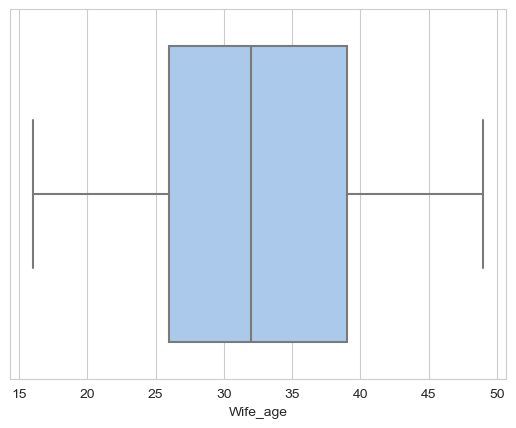

In [867]:
sns.boxplot(contra['Wife_age'])

In [1022]:
age_impute=contra['Wife_age'].mean()

In [869]:
noc_impute=contra['No_of_children_born'].mode()[0]

In [870]:
contra['Wife_age'].fillna(age_impute,inplace=True)
contra['No_of_children_born'].fillna(noc_impute,inplace=True)

In [871]:
contra.isna().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [872]:
contra.shape

(1393, 10)

In [873]:
contra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   object 
 2   Husband_education          1393 non-null   object 
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   object 
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 119.7+ KB


In [874]:
contra.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

In [875]:
contra_num=contra[['Wife_age','No_of_children_born']]
contra_cat=contra.drop(['Wife_age'],axis=1)

In [876]:
for i in contra_cat.columns:
    print(contra_cat[i].value_counts())

Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: Wife_ education, dtype: int64
Tertiary      827
Secondary     347
Primary       175
Uneducated     44
Name: Husband_education, dtype: int64
2.0     279
1.0     257
3.0     232
4.0     180
5.0     126
0.0      92
6.0      88
7.0      49
8.0      45
9.0      16
10.0     11
11.0     11
12.0      4
13.0      2
16.0      1
Name: No_of_children_born, dtype: int64
Scientology        1186
Non-Scientology     207
Name: Wife_religion, dtype: int64
No     1043
Yes     350
Name: Wife_Working, dtype: int64
3    570
2    415
1    381
4     27
Name: Husband_Occupation, dtype: int64
Very High    618
High         419
Low          227
Very Low     129
Name: Standard_of_living_index, dtype: int64
Exposed        1284
Not-Exposed     109
Name: Media_exposure , dtype: int64
Yes    779
No     614
Name: Contraceptive_method_used, dtype: int64


### EDA

#### Univariate Analysis

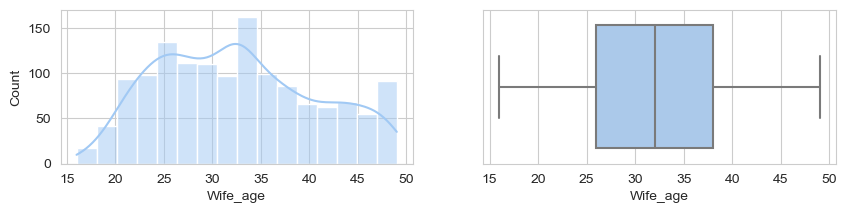

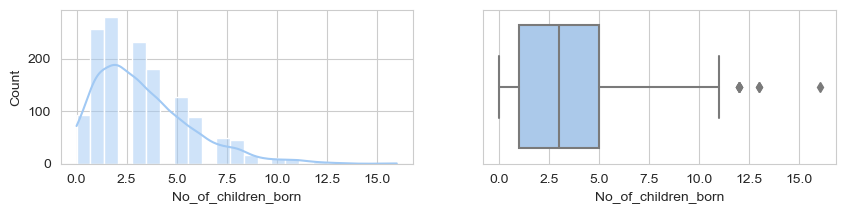

In [1026]:
for i in contra_num.columns:
    fig, axes = plt.subplots(ncols=2,figsize=(10,2))
    sns.histplot(x=contra_num[i],kde=True, ax=axes[0])
    sns.boxplot(x=contra_num[i],ax=axes[1])
    plt.show()

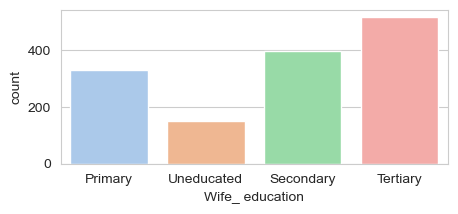

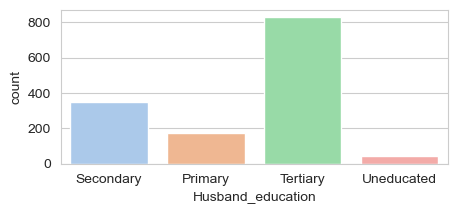

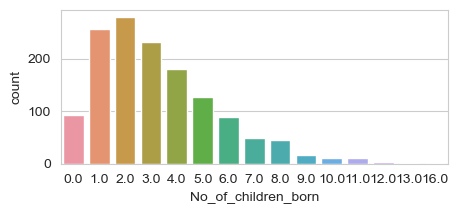

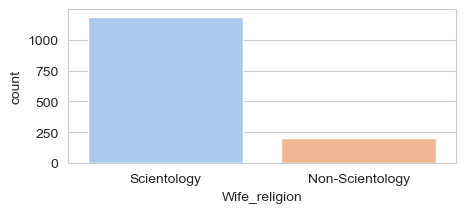

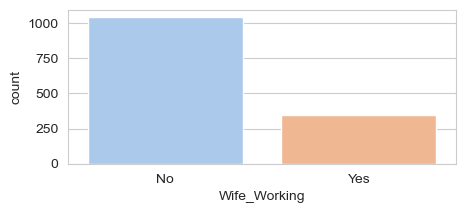

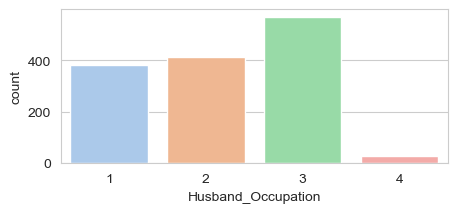

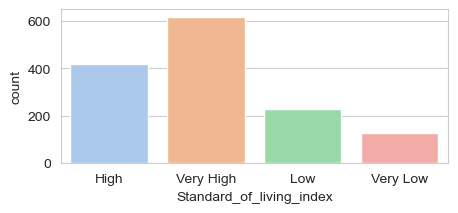

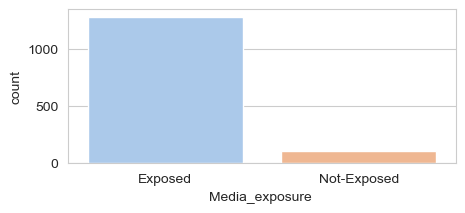

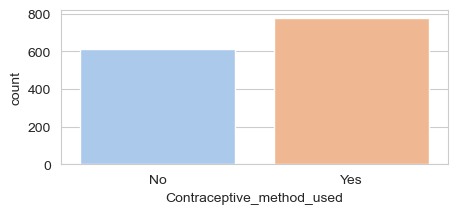

In [1030]:
for i in contra_cat.columns:
    plt.figure(figsize=(5,2))
    sns.countplot(x=contra_cat[i])
    plt.show()

Observations:
- The age of wife is almost normally distributed
- There are a few outliers in the Number_of_children_born field
- Most women are educated, with the highest number of women having completed teritiary education
- The husband_education field also has maximum values in teritiary education field, with only a very low count of uneducated males.
- Most have upto 4 children. However, the data also shows people having more than 10 children. These might be genuine, or bad values.
- Most women adopt scientology as religion
- Most of the women are ot working
- A majority of the husbands have occupation -3
- This data has high counts of people having high or very high standard of living index
- Most of these people are media exposed
- most of these people have used a contraceptive method

#### Bivariate Analysis and Multivariate analysis

<AxesSubplot:xlabel='Wife_age', ylabel='No_of_children_born'>

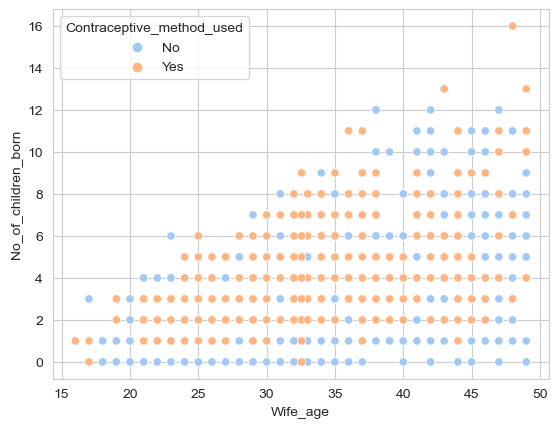

In [879]:
sns.scatterplot(x=contra['Wife_age'],y=contra['No_of_children_born'], hue=contra['Contraceptive_method_used'])

<AxesSubplot:xlabel='Wife_age', ylabel='No_of_children_born'>

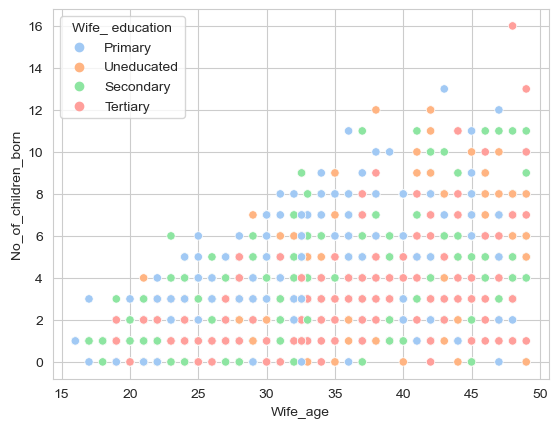

In [880]:
sns.scatterplot(x=contra['Wife_age'],y=contra['No_of_children_born'], hue=contra['Wife_ education'])

<AxesSubplot:xlabel='Wife_age', ylabel='No_of_children_born'>

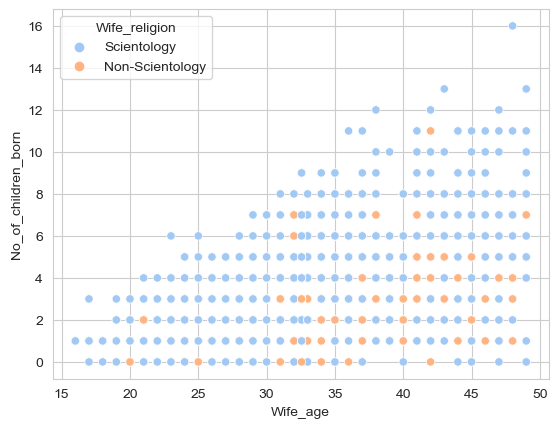

In [881]:
sns.scatterplot(x=contra['Wife_age'],y=contra['No_of_children_born'], hue=contra['Wife_religion'])

In [882]:
ct=pd.crosstab(index=[contra['Contraceptive_method_used']],columns=[contra['Wife_Working'],contra['Wife_religion']],normalize=True)

<AxesSubplot:xlabel='Wife_Working-Wife_religion', ylabel='Contraceptive_method_used'>

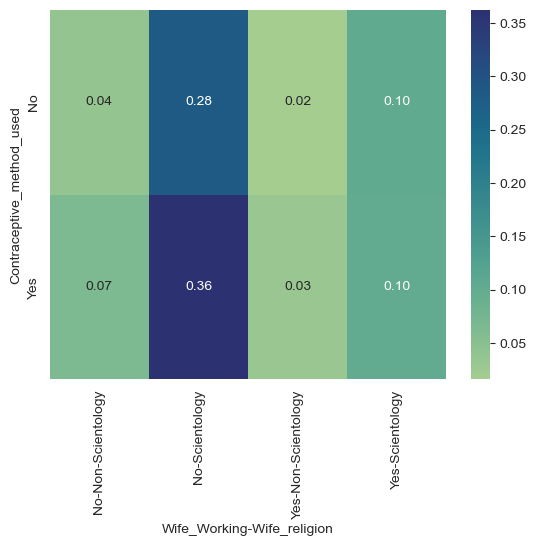

In [883]:
sns.heatmap(ct,annot=True, fmt='.2f',cmap='crest')

In [884]:
ct=pd.crosstab(index=[contra['Contraceptive_method_used']],columns=[contra['Wife_ education']],normalize=True)

<AxesSubplot:xlabel='Wife_ education', ylabel='Contraceptive_method_used'>

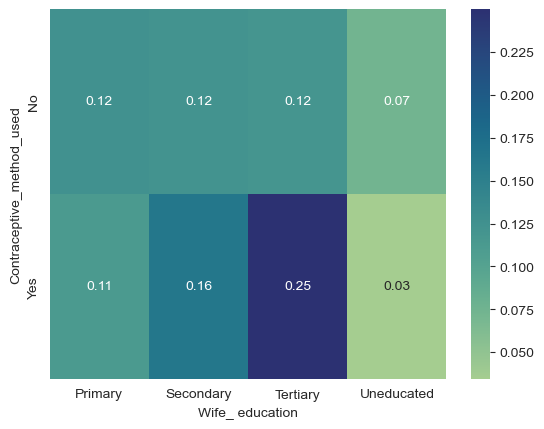

In [885]:
sns.heatmap(ct,annot=True, fmt='.2f',cmap='crest')

In [886]:
ct=pd.crosstab(index=[contra['Contraceptive_method_used']],columns=[contra['Husband_Occupation'],contra['Husband_education']],normalize=True)

<AxesSubplot:xlabel='Husband_Occupation-Husband_education', ylabel='Contraceptive_method_used'>

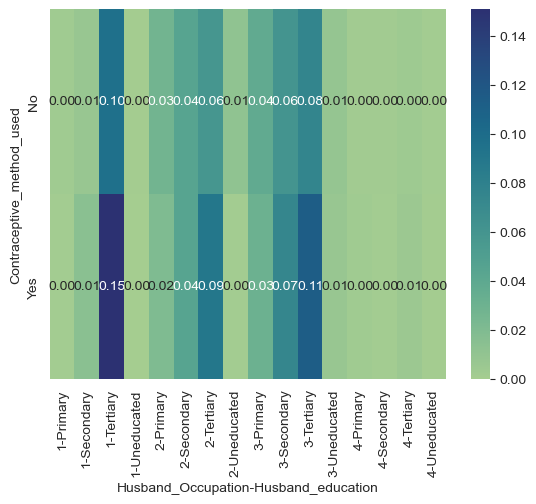

In [887]:
sns.heatmap(ct,annot=True, fmt='.2f',cmap='crest')

In [888]:
ct=pd.crosstab(index=[contra['Contraceptive_method_used']],columns=[contra['Standard_of_living_index']],normalize=True)

<AxesSubplot:xlabel='Standard_of_living_index', ylabel='Contraceptive_method_used'>

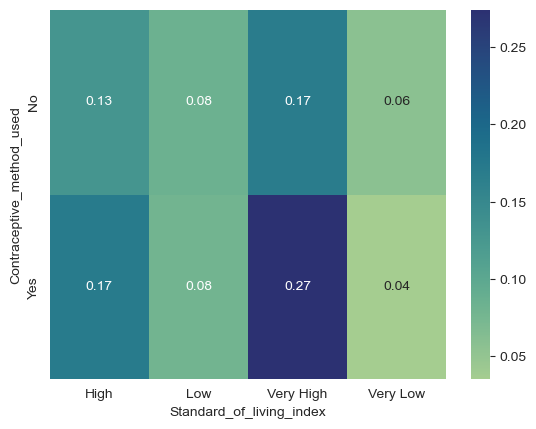

In [889]:
sns.heatmap(ct,annot=True,fmt='.2f',cmap='crest')

<AxesSubplot:xlabel='No_of_children_born', ylabel='count'>

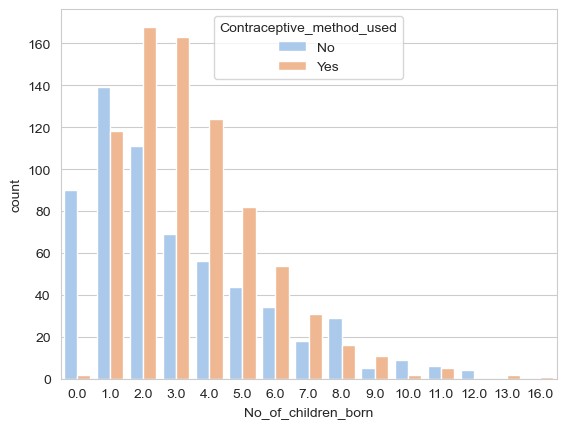

In [890]:
sns.countplot(x=contra['No_of_children_born'],hue=contra['Contraceptive_method_used'])

## Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

### Encoding

In [891]:
contra_cat.columns

Index(['Wife_ education', 'Husband_education', 'No_of_children_born',
       'Wife_religion', 'Wife_Working', 'Husband_Occupation',
       'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

In [892]:
contra['Wife_ education']=np.where(contra['Wife_ education']=='Uneducated',1,contra['Wife_ education'])
contra['Wife_ education']=np.where(contra['Wife_ education']=='Primary',2,contra['Wife_ education'])
contra['Wife_ education']=np.where(contra['Wife_ education']=='Secondary',3,contra['Wife_ education'])
contra['Wife_ education']=np.where(contra['Wife_ education']=='Tertiary',4,contra['Wife_ education'])

In [893]:
contra['Husband_education']=np.where(contra['Husband_education']=='Uneducated',1,contra['Husband_education'])
contra['Husband_education']=np.where(contra['Husband_education']=='Primary',2,contra['Husband_education'])
contra['Husband_education']=np.where(contra['Husband_education']=='Secondary',3,contra['Husband_education'])
contra['Husband_education']=np.where(contra['Husband_education']=='Tertiary',4,contra['Husband_education'])

In [894]:
contra['Wife_religion']=np.where(contra['Wife_religion']=='Non-Scientology',0,contra['Wife_religion'])
contra['Wife_religion']=np.where(contra['Wife_religion']=='Scientology',1,contra['Wife_religion'])

In [895]:
contra['Wife_Working']=np.where(contra['Wife_Working']== 'Yes',1,contra['Wife_Working'])
contra['Wife_Working']=np.where(contra['Wife_Working']== 'No',0,contra['Wife_Working'])

In [896]:
contra['Standard_of_living_index']=np.where(contra['Standard_of_living_index']== 'Very Low',1,contra['Standard_of_living_index'])
contra['Standard_of_living_index']=np.where(contra['Standard_of_living_index']== 'Low',2,contra['Standard_of_living_index'])
contra['Standard_of_living_index']=np.where(contra['Standard_of_living_index']== 'High',3,contra['Standard_of_living_index'])
contra['Standard_of_living_index']=np.where(contra['Standard_of_living_index']== 'Very High',4,contra['Standard_of_living_index'])

In [897]:
contra['Media_exposure ']=np.where(contra['Media_exposure ']=='Exposed',1,contra['Media_exposure '])
contra['Media_exposure ']=np.where(contra['Media_exposure ']=='Not-Exposed',0,contra['Media_exposure '])

contra['Contraceptive_method_used']=np.where(contra['Contraceptive_method_used']=='Yes',1,contra['Contraceptive_method_used'])
contra['Contraceptive_method_used']=np.where(contra['Contraceptive_method_used']=='No',0,contra['Contraceptive_method_used'])

In [898]:
for i in contra_cat.columns:
    print(contra[i].value_counts())

4    515
3    398
2    330
1    150
Name: Wife_ education, dtype: int64
4    827
3    347
2    175
1     44
Name: Husband_education, dtype: int64
2.0     279
1.0     257
3.0     232
4.0     180
5.0     126
0.0      92
6.0      88
7.0      49
8.0      45
9.0      16
10.0     11
11.0     11
12.0      4
13.0      2
16.0      1
Name: No_of_children_born, dtype: int64
1    1186
0     207
Name: Wife_religion, dtype: int64
0    1043
1     350
Name: Wife_Working, dtype: int64
3    570
2    415
1    381
4     27
Name: Husband_Occupation, dtype: int64
4    618
3    419
2    227
1    129
Name: Standard_of_living_index, dtype: int64
1    1284
0     109
Name: Media_exposure , dtype: int64
Yes    779
No     614
Name: Contraceptive_method_used, dtype: int64


### Data Split

In [946]:
X=contra.drop(['Contraceptive_method_used'],axis=1)
Y=contra['Contraceptive_method_used']

In [947]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=123)

### Logistic Regression

In [901]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_auc_score, roc_curve

In [964]:
logr_model= LogisticRegression()
logr_model.fit(x_train,y_train)
y_predict_logr=logr_model.predict(x_test)
y_predict_logr_train=logr_model.predict(x_train)

In [951]:
print('Logistic Regression Score', np.round(logr_model.score(x_test,y_test)))
print('\nConfusion Matrix:\n', confusion_matrix(y_test,y_predict))
print('\n Classification Report:\n',classification_report(y_test,y_predict))

Logistic Regression Score 1.0

Confusion Matrix:
 [[ 91  93]
 [ 55 179]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.49      0.55       184
           1       0.66      0.76      0.71       234

    accuracy                           0.65       418
   macro avg       0.64      0.63      0.63       418
weighted avg       0.64      0.65      0.64       418



In [952]:
logr_model.intercept_

array([0.1078024])

In [953]:
logr_model.coef_

array([[-0.07536076,  0.57227328, -0.04647803,  0.30545711, -0.25215577,
        -0.06232109,  0.08131275,  0.15670901,  0.34970257]])

log(odds)=-0.425 - 0.077 * Wife_age + 0.567 * Wife_education - 0.048 * Husband_education + 0.308 * No_of_children_born - 0.265 * Wife_religion - 0.065 * Wife_working + 0.069 * Husband_occupation + 0.158 * Standard_of_living_index + 0.314 * Media_exposure

### Linear Discriminant Analysis

In [911]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [963]:
lda_model=LinearDiscriminantAnalysis()
lda_model.fit(x_train,y_train)
y_predict_lda=lda_model.predict(x_test)
y_predict_lda_train=lda_model.predict(x_train)

In [959]:
print('LDA Score', np.round(lda_model.score(x_test,y_test)))
print('\nConfusion Matrix:\n', confusion_matrix(y_test,y_predict_lda))
print('\n Classification Report:\n',classification_report(y_test,y_predict_lda))

LDA Score 1.0

Confusion Matrix:
 [[ 89  95]
 [ 52 182]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.48      0.55       184
           1       0.66      0.78      0.71       234

    accuracy                           0.65       418
   macro avg       0.64      0.63      0.63       418
weighted avg       0.65      0.65      0.64       418



In [960]:
lda_model.intercept_

array([0.28661149])

In [961]:
lda_model.coef_

array([[-0.07498125,  0.57213843, -0.05700247,  0.29653534, -0.28711323,
        -0.0705615 ,  0.06860572,  0.15720877,  0.29850463]])

### CART

In [917]:
for i in contra.columns:
    if contra[i].dtype == 'object':
        contra[i]=pd.Categorical(contra[i]).codes

In [918]:
X=contra.drop(['Contraceptive_method_used'],axis=1)
Y=contra['Contraceptive_method_used']

In [919]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=123)

In [920]:
from sklearn.tree import DecisionTreeClassifier

In [921]:
dt_model=DecisionTreeClassifier(criterion='gini')
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [923]:
from sklearn.tree import export_graphviz
tree_class_label= ['No','Yes']
tree_file = open('C:\\Users\\India\\Desktop\\gl\\predictive modelling\\project\\tree_pjt.dot', 'w')

In [924]:
dot_data=export_graphviz(dt_model,out_file=tree_file,feature_names=list(x_train),class_names=tree_class_label)

In [925]:
tree_file.close()

In [931]:
dt_model.feature_importances_

array([0.34401306, 0.08474328, 0.05804799, 0.23765628, 0.03866175,
       0.03740954, 0.08571484, 0.08914521, 0.02460806])

Observations:
- The output of the model is an unpruned and overgrown tree
- There are 20 levels
- No feature has a coefficient of 0.

In [926]:
reg_dt_model=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=10,min_samples_split=30)

In [927]:
reg_dt_model.fit(x_train,y_train)
tree_class_label_reg= ['No','Yes']
tree_file_reg = open('C:\\Users\\India\\Desktop\\gl\\predictive modelling\\project\\tree_pjt_reg.dot', 'w')

In [928]:
dot_data_reg=export_graphviz(reg_dt_model,out_file=tree_file_reg,feature_names=list(x_train),class_names=tree_class_label_reg)

In [929]:
tree_file_reg.close()

In [938]:
y_predict_dtc=dt_model.predict(x_test)

In [941]:
print(' DTC model Score', np.round(dt_model.score(x_test,y_test)))
print('\nConfusion Matrix:\n', confusion_matrix(y_test,y_predict_dtc))
print('\n Classification Report:\n',classification_report(y_test,y_predict_dtc))

 DTC model Score 1.0

Confusion Matrix:
 [[104  80]
 [ 88 146]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.57      0.55       184
           1       0.65      0.62      0.63       234

    accuracy                           0.60       418
   macro avg       0.59      0.59      0.59       418
weighted avg       0.60      0.60      0.60       418



In [930]:
reg_dt_model.feature_importances_

array([0.36249183, 0.1581536 , 0.00355571, 0.39025719, 0.        ,
       0.00229909, 0.0532078 , 0.02859824, 0.00143655])

Observations:
- The output of the model is an pruned tree
- There are 10 levels
- 1 feature has a coefficient of 0- Wife_religion,  and 2 have coefficients close to 0- Wife_working, Media_exposure.

In [933]:
contra.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

In [965]:
y_predict_dtc_reg=reg_dt_model.predict(x_test)
y_predict_dtc_reg_train=reg_dt_model.predict(x_train)

In [942]:
print('Regularized DTC Model Score', np.round(reg_dt_model.score(x_test,y_test)))
print('\nConfusion Matrix:\n', confusion_matrix(y_test,y_predict_dtc_reg))
print('\n Classification Report:\n',classification_report(y_test,y_predict_dtc_reg))

Regularized DTC Model Score 1.0

Confusion Matrix:
 [[100  84]
 [ 47 187]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.54      0.60       184
           1       0.69      0.80      0.74       234

    accuracy                           0.69       418
   macro avg       0.69      0.67      0.67       418
weighted avg       0.69      0.69      0.68       418



Observations:
- On comparing the regularised and original decision tree model, the f1 score has improved for both classes in the regularised model
- However, the accuracy has decreased.

## Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

### Model Accuracy Comparison

In [967]:
print('Train data:')
print('\n Logistic Regression:\n',classification_report(y_train,y_predict_logr_train))
print('\n LDA:\n',classification_report(y_train,y_predict_lda_train))
print('\n CART-Decision Tree- regularized:\n',classification_report(y_train,y_predict_dtc_reg_train))

Train data:

 Logistic Regression:
               precision    recall  f1-score   support

           0       0.65      0.50      0.57       430
           1       0.67      0.79      0.72       545

    accuracy                           0.66       975
   macro avg       0.66      0.64      0.64       975
weighted avg       0.66      0.66      0.65       975


 LDA:
               precision    recall  f1-score   support

           0       0.66      0.48      0.56       430
           1       0.66      0.81      0.73       545

    accuracy                           0.66       975
   macro avg       0.66      0.64      0.64       975
weighted avg       0.66      0.66      0.65       975


 CART-Decision Tree- regularized:
               precision    recall  f1-score   support

           0       0.78      0.62      0.69       430
           1       0.74      0.86      0.80       545

    accuracy                           0.76       975
   macro avg       0.76      0.74      0.75     

In [966]:
print('Test data:')
print('\n Logistic Regression:\n',classification_report(y_test,y_predict_logr))
print('\n LDA:\n',classification_report(y_test,y_predict_lda))
print('\n CART-Decision Tree- regularized:\n',classification_report(y_test,y_predict_dtc_reg))

Test data:

 Logistic Regression:
               precision    recall  f1-score   support

           0       0.62      0.49      0.55       184
           1       0.66      0.76      0.71       234

    accuracy                           0.65       418
   macro avg       0.64      0.63      0.63       418
weighted avg       0.64      0.65      0.64       418


 LDA:
               precision    recall  f1-score   support

           0       0.63      0.48      0.55       184
           1       0.66      0.78      0.71       234

    accuracy                           0.65       418
   macro avg       0.64      0.63      0.63       418
weighted avg       0.65      0.65      0.64       418


 CART-Decision Tree- regularized:
               precision    recall  f1-score   support

           0       0.68      0.54      0.60       184
           1       0.69      0.80      0.74       234

    accuracy                           0.69       418
   macro avg       0.69      0.67      0.67      

Observations:
- Train Data
    - CART is better in terms of accuracy- 0.76 against 0.66 for LDA and Logistic Regression
    - CART also gives better F1 scores for both the classes(0.69 and 0.80) as against LDA (0.56 and 0.73)and Logistic regression(0.57 and 0.72)
- Test Data
    - CART is better in terms of accuracy- 0.69 against 0.65 for LDA and Logistic Regression
    - CART also gives better F1 scores for both the classes(0.60 and 0.74) as against LDA and Logistic regression(0.55 and 0.71)

### Confusion matrix comparison

In [968]:
cm_logr_train=confusion_matrix(y_train,y_predict_logr_train)
cm_lda_train=confusion_matrix(y_train, y_predict_lda_train)
cm_regdtc_train=confusion_matrix(y_train,y_predict_dtc_reg_train)

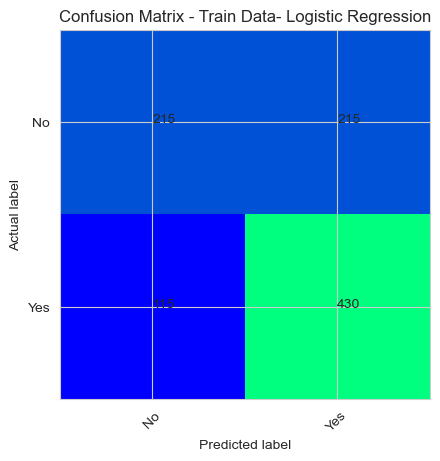

In [974]:
plt.clf()
plt.imshow(cm_logr_train, interpolation='nearest', cmap=plt.cm.winter)
classNames = ['No', 'Yes']
plt.title('Confusion Matrix - Train Data- Logistic Regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(cm_logr_train[i][j]))
plt.show()

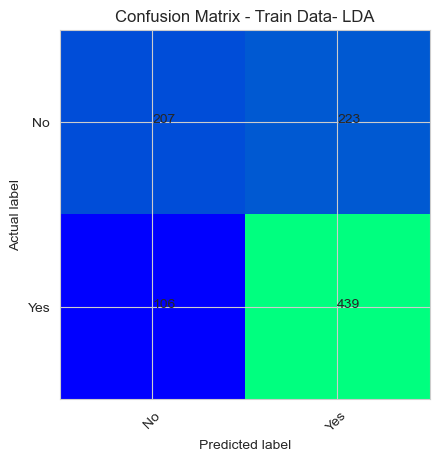

In [976]:
plt.clf()
plt.imshow(cm_lda_train, interpolation='nearest', cmap=plt.cm.winter)
classNames = ['No', 'Yes']
plt.title('Confusion Matrix - Train Data- LDA')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(cm_lda_train[i][j]))
plt.show()

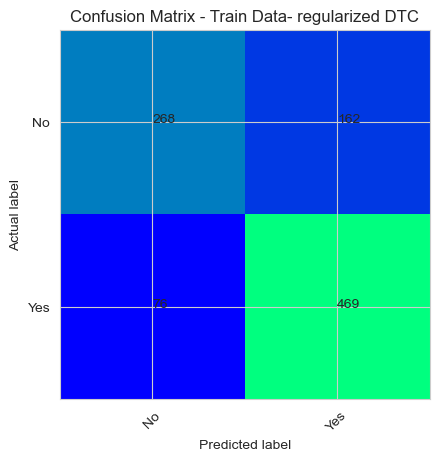

In [977]:
plt.clf()
plt.imshow(cm_regdtc_train, interpolation='nearest', cmap=plt.cm.winter)
classNames = ['No', 'Yes']
plt.title('Confusion Matrix - Train Data- regularized DTC')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(cm_regdtc_train[i][j]))
plt.show()

In [978]:
cm_logr_test=confusion_matrix(y_test,y_predict_logr)
cm_lda_test=confusion_matrix(y_test, y_predict_lda)
cm_regdtc_test=confusion_matrix(y_test,y_predict_dtc_reg)

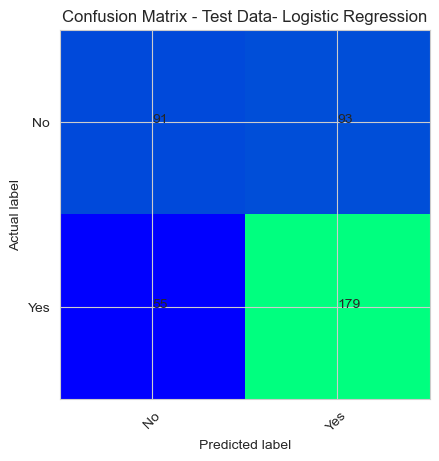

In [979]:
plt.clf()
plt.imshow(cm_logr_test, interpolation='nearest', cmap=plt.cm.winter)
classNames = ['No', 'Yes']
plt.title('Confusion Matrix - Test Data- Logistic Regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(cm_logr_test[i][j]))
plt.show()

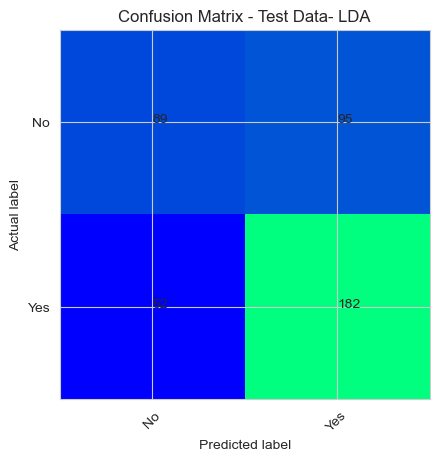

In [980]:
plt.clf()
plt.imshow(cm_lda_test, interpolation='nearest', cmap=plt.cm.winter)
classNames = ['No', 'Yes']
plt.title('Confusion Matrix - Test Data- LDA')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(cm_lda_test[i][j]))
plt.show()

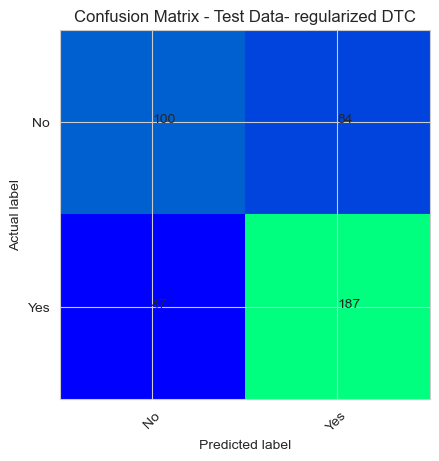

In [981]:
plt.clf()
plt.imshow(cm_regdtc_test, interpolation='nearest', cmap=plt.cm.winter)
classNames = ['No', 'Yes']
plt.title('Confusion Matrix - Test Data- regularized DTC')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(cm_regdtc_test[i][j]))
plt.show()

### ROC Curve and ROC_AUC_Score

In [983]:
probs_logr_train=logr_model.predict_proba(x_train)
probs_logr_train=probs_logr_train[:,1]
probs_lda_train=lda_model.predict_proba(x_train)
probs_lda_train=probs_lda_train[:,1]
probs_rdtc_train=reg_dt_model.predict_proba(x_train)

In [989]:
probs_rdtc_train=probs_rdtc_train[:,1]

In [990]:
probs_logr_test=logr_model.predict_proba(x_test)
probs_logr_test=probs_logr_test[:,1]
probs_lda_test=lda_model.predict_proba(x_test)
probs_lda_test=probs_lda_test[:,1]
probs_rdtc_test=reg_dt_model.predict_proba(x_test)
probs_rdtc_test=probs_rdtc_test[:,1]

Text(0.5, 1.0, 'Logistic Regression- Train Data- ROC Curve')

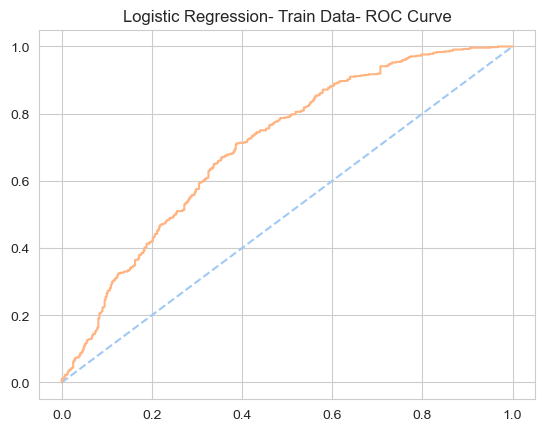

In [995]:
train_fpr_logr, train_tpr_logr, train_thresholds_logr=roc_curve(y_train,probs_logr_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr_logr,train_tpr_logr)
plt.title('Logistic Regression- Train Data- ROC Curve')

Text(0.5, 1.0, 'LDA- Train Data- ROC Curve')

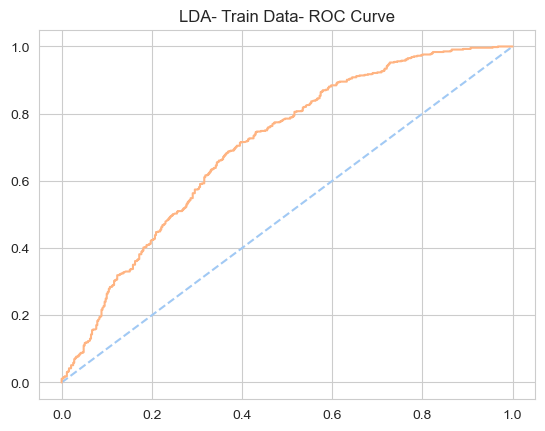

In [993]:
train_fpr_lda, train_tpr_lda, train_thresholds_lda=roc_curve(y_train,probs_lda_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr_lda,train_tpr_lda)
plt.title('LDA- Train Data- ROC Curve')

Text(0.5, 1.0, 'Regularized DTC- Train Data- ROC Curve')

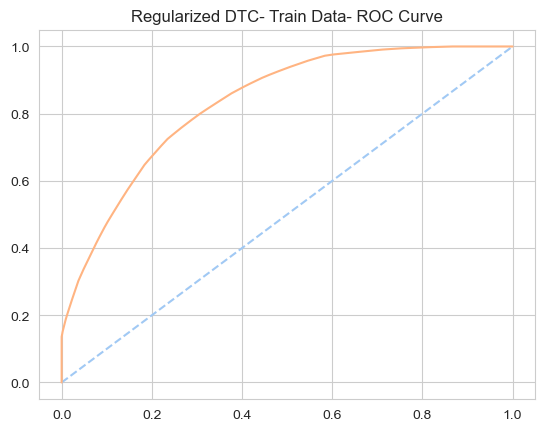

In [994]:
train_fpr_rdtc, train_tpr_rdtc, train_thresholds_rdtc=roc_curve(y_train,probs_rdtc_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr_rdtc,train_tpr_rdtc)
plt.title('Regularized DTC- Train Data- ROC Curve')

Text(0.5, 1.0, 'Logistic Regression- Test Data- ROC Curve')

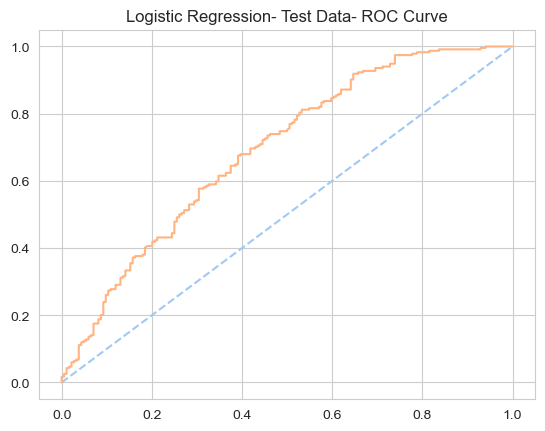

In [996]:
test_fpr_logr, test_tpr_logr, test_thresholds_logr=roc_curve(y_test,probs_logr_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr_logr,test_tpr_logr)
plt.title('Logistic Regression- Test Data- ROC Curve')

Text(0.5, 1.0, 'LDA- Test Data- ROC Curve')

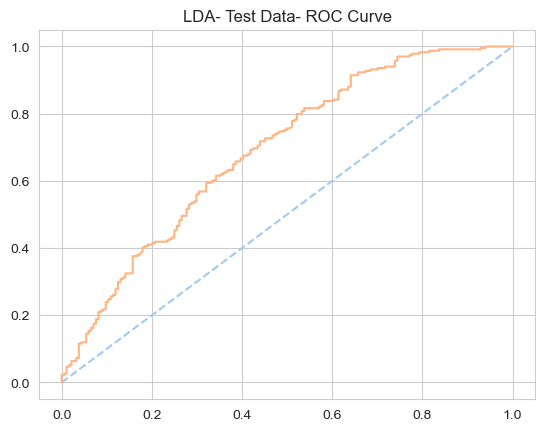

In [997]:
test_fpr_lda, test_tpr_lda, test_thresholds_lda=roc_curve(y_test,probs_lda_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr_lda,test_tpr_lda)
plt.title('LDA- Test Data- ROC Curve')

Text(0.5, 1.0, 'Regularized DTC- Test Data- ROC Curve')

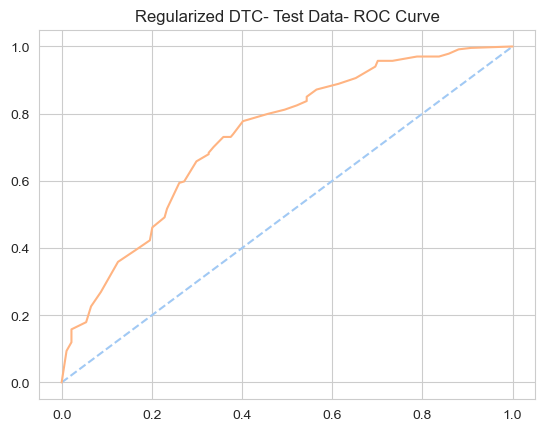

In [998]:
test_fpr_rdtc, test_tpr_rdtc, test_thresholds_rdtc=roc_curve(y_test,probs_rdtc_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr_rdtc,test_tpr_rdtc)
plt.title('Regularized DTC- Test Data- ROC Curve')

In [999]:
print('Train Data: AUC Scores:\n')
print('\n Logistic Regression:',np.round(roc_auc_score(y_train,probs_logr_train),3))
print('\n LDA:',np.round(roc_auc_score(y_train,probs_lda_train),3))
print('\n Regularized DTC:',np.round(roc_auc_score(y_train,probs_rdtc_train),3))

Train Data: AUC Scores:


 Logistic Regression: 0.704

 LDA: 0.703

 Regularized DTC: 0.833


In [1000]:
print('Test Data: AUC Scores:\n')
print('\n Logistic Regression:',np.round(roc_auc_score(y_test,probs_logr_test),3))
print('\n LDA:',np.round(roc_auc_score(y_test,probs_lda_test),3))
print('\n Regularized DTC:',np.round(roc_auc_score(y_test,probs_rdtc_test),3))

Test Data: AUC Scores:


 Logistic Regression: 0.691

 LDA: 0.69

 Regularized DTC: 0.733
